In [146]:
import numpy as np
from numpy import random
from numpy.linalg import inv
import pandas as pd
import os
import scipy
from scipy import stats

from collections import Counter

import matplotlib
from matplotlib import pyplot as plt
import scipy
from scipy import stats
from collections import Counter
from scipy.stats import skew,kurtosis
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import scipy
from scipy import stats
from scipy.stats import binom

from scipy.stats import poisson
from scipy.stats import expon

from scipy.stats import t

import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as sw


import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats import weightstats as ssw


from statsmodels.stats.multicomp import pairwise_tukeyhsd

from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import proportions_ztest




from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency

from statsmodels.stats import rates
from statsmodels.stats.rates import test_poisson
from statsmodels.stats.rates import test_poisson_2indep


## 1. Data Cleaning and Preprocessing

Handle missing values in columns, Convert categorical variables into usable formats for analysis. Parse and standardize date columns, Create derived fields, Remove duplicate records if any, handle outliers if any.


In [ ]:
df=pd.read_csv('hotel_bookings.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# null childern
df['children'].mode()

# we found out the overall mode of the  childern throught out the  data is 0
# according to me if the values are null the chances are there are no childern

,children
0,0.0


In [ ]:
df['children']=df['children'].fillna(0).astype(int)

In [ ]:
df['children'].unique()

array([ 0,  1,  2, 10,  3])

In [ ]:
len(df)

119390

In [ ]:
df['country'].isnull().sum()

np.int64(488)

In [ ]:

(df.isnull().sum()/(len(df)))*100

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


In [ ]:
# null countries

np.round(488/119390*100,2)
# there are only 0.4% countries are null insted of going towards knn i found out mode and filled it.

np.float64(0.41)

In [ ]:
df['country'].mode()

,country
0,PRT


In [ ]:
df['country'].fillna('PRT',inplace=True)

<ipython-input-15-c0bb89b0057d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('PRT',inplace=True)


In [ ]:
# agent we assumed that if there is no agent whihc means the customer bookes his own tickets

df['agent']=df['agent'].fillna(0).astype(int)

In [ ]:
#company

# we filled company with zero which means the peoples does not comes from any company

df['company']=df['company'].fillna(0)

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Droping duplicate


In [ ]:
df=df.drop_duplicates()


In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
# converted reservation_status_date into data and time format

creating new colums for total nights

In [ ]:
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [ ]:
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d',
    errors='coerce'  # Converts invalid formats to NaT (missing date)
)

converted the meals into int type for processing

In [ ]:
meal_map = {
    'BB': 0,       # Bed & Breakfast
    'FB': 1,       # Full Board
    'HB': 2,       # Half Board
    'SC': 3,       # Self Catering
    'Undefined': 4
}
df['meal_int'] = df['meal'].map(meal_map)

In [ ]:
df.shape

(87377, 36)

In [ ]:
df['revenue']=df['adr']*df['total_nights']

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Finding outliers

In [ ]:
num_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'adr']

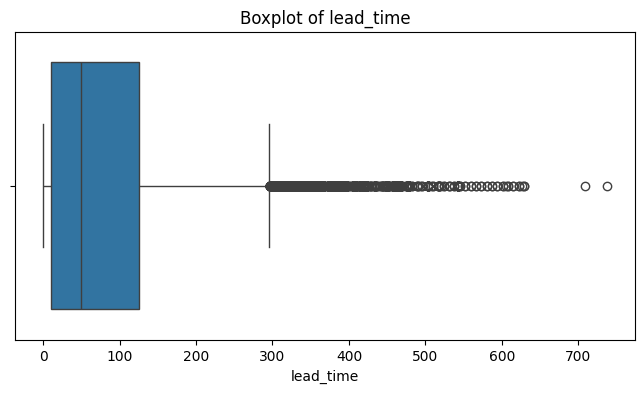

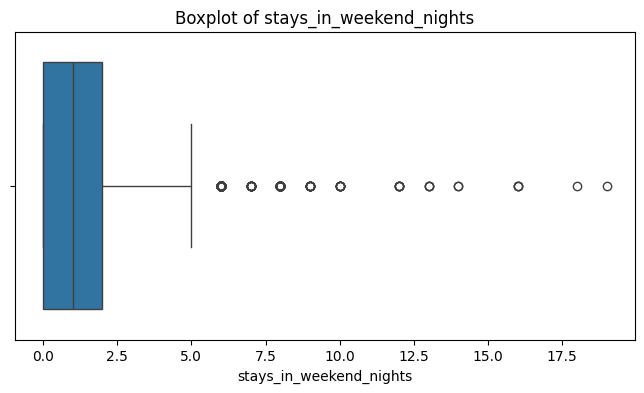

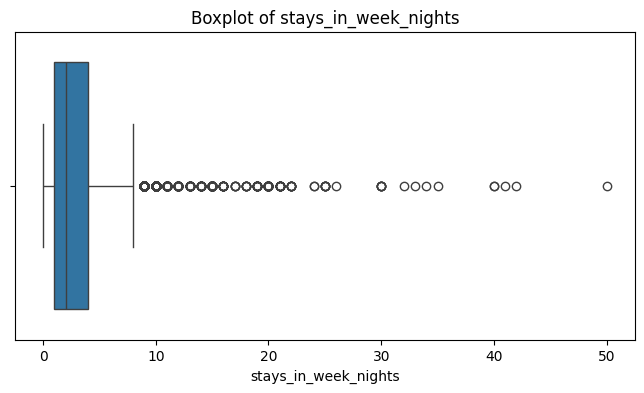

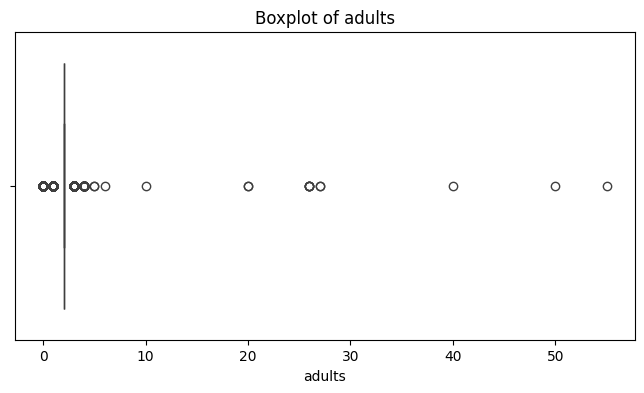

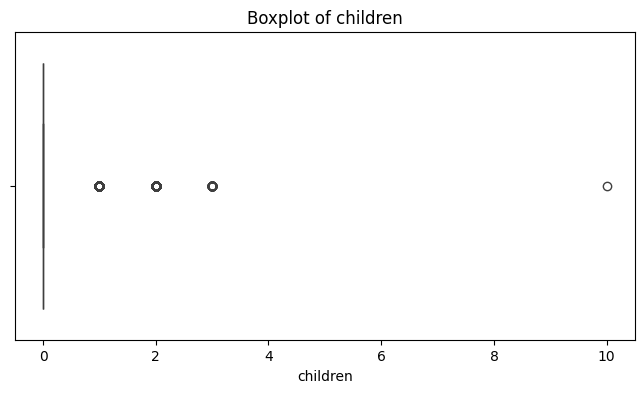

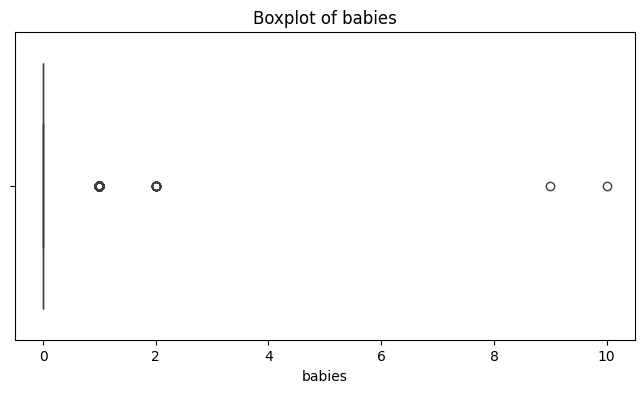

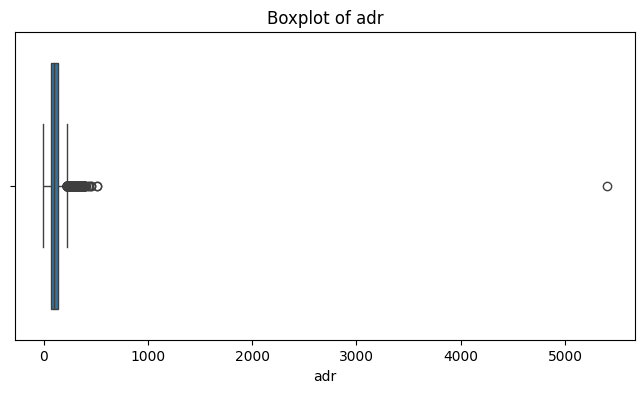

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Removing outlier of adr


<Axes: ylabel='adr'>

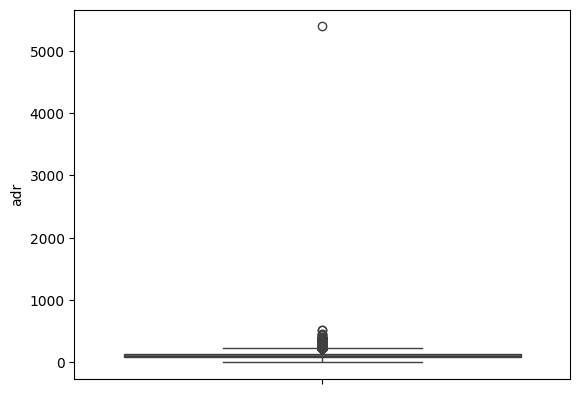

In [ ]:
sns.boxplot(df['adr'])

In [ ]:
def bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    return filtered_df

In [ ]:
df = bounds(df, 'adr')

<Axes: ylabel='adr'>

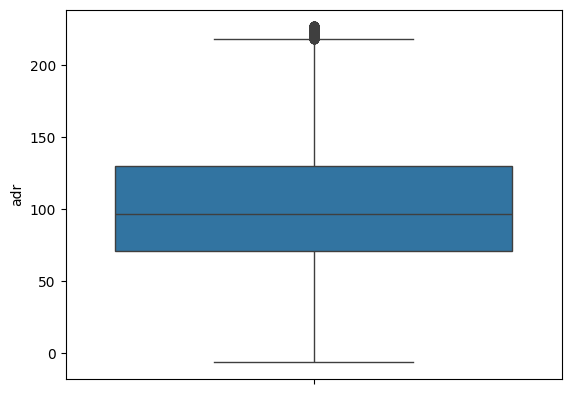

In [ ]:
sns.boxplot(df['adr'])

##  Exploratory Data Analysis

Finding top countries

Text(0.5, 0, 'Country Code')

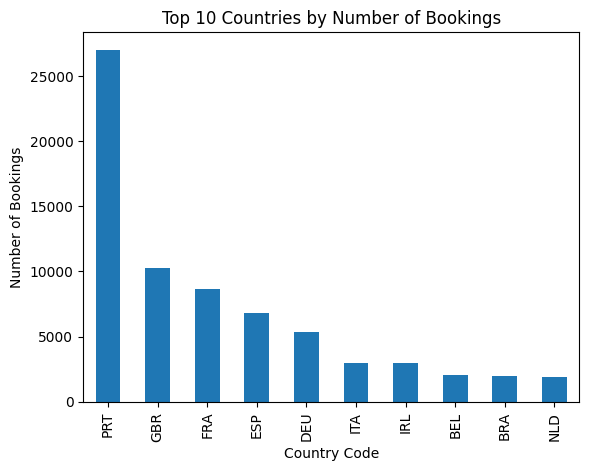

In [ ]:
top_country= df['country'].value_counts().head(10)
top_country.plot(kind='bar')
plt.title("Top 10 Countries by Number of Bookings")
plt.ylabel("Number of Bookings")
plt.xlabel("Country Code")

Count of Bookings by Hotel Type

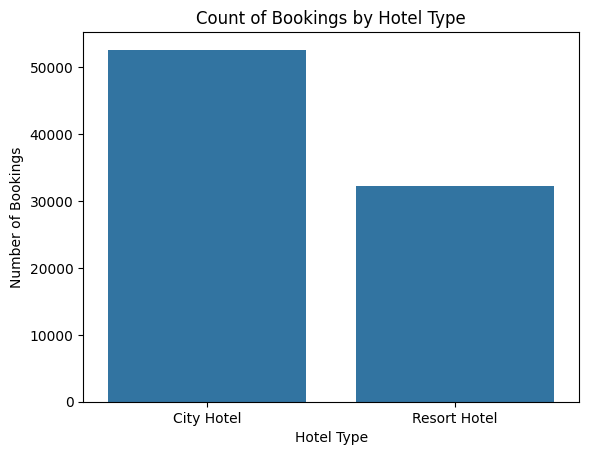

In [ ]:
hotel_counts = df['hotel'].value_counts().reset_index()
hotel_counts.columns = ['hotel', 'count']
sns.barplot(data=hotel_counts, x='hotel', y='count')
plt.title("Count of Bookings by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Number of Bookings")
plt.show()

In [ ]:
df['is_canceled'].value_counts()

,count
is_canceled,
0,61830
1,23059


Text(0, 0.5, '')

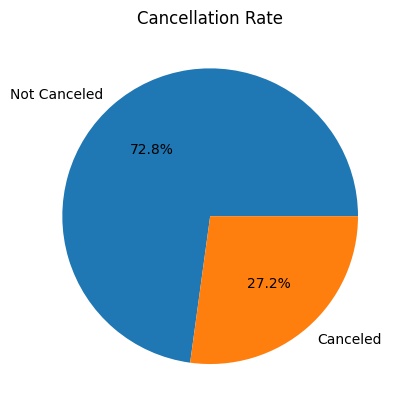

In [ ]:
df['is_canceled'].replace({0:'Not Canceled',1:'Canceled'}).value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Cancellation Rate')
plt.ylabel('')

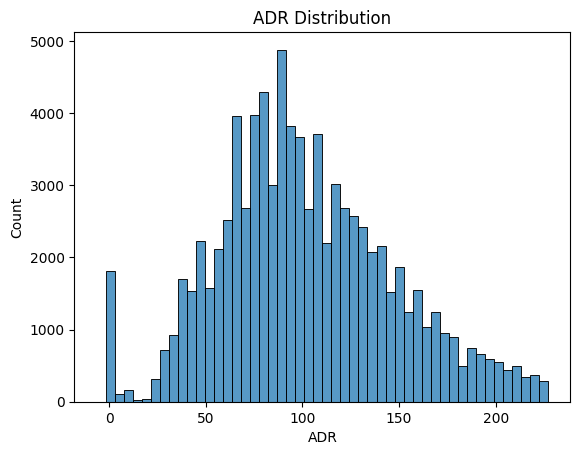

In [ ]:
sns.histplot(df['adr'], bins=50)
plt.xlabel('ADR')
plt.title('ADR Distribution')
plt.show()

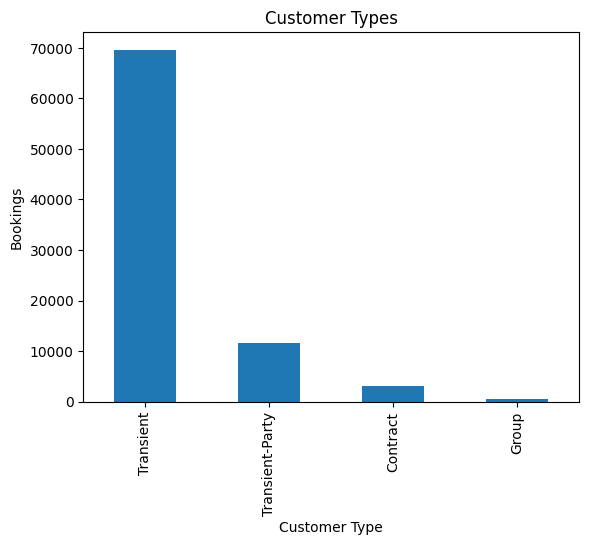

In [ ]:
plt.figure()
df['customer_type'].value_counts().plot(kind='bar')
plt.xlabel('Customer Type')
plt.ylabel('Bookings')
plt.title('Customer Types')
plt.show()

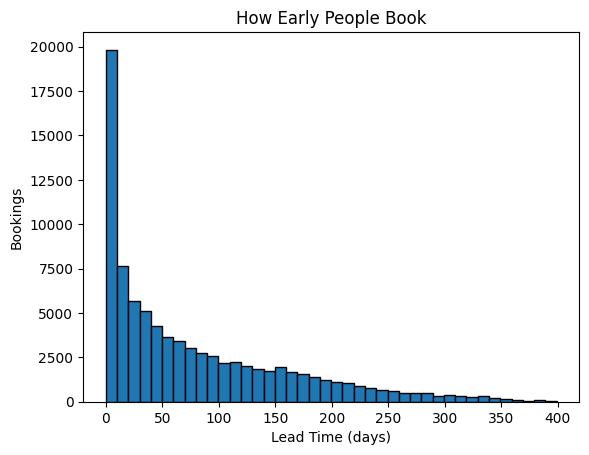

In [ ]:
df[df['lead_time'] < 400]['lead_time'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlabel('Lead Time (days)')
plt.ylabel('Bookings')
plt.title('How Early People Book')
plt.show()

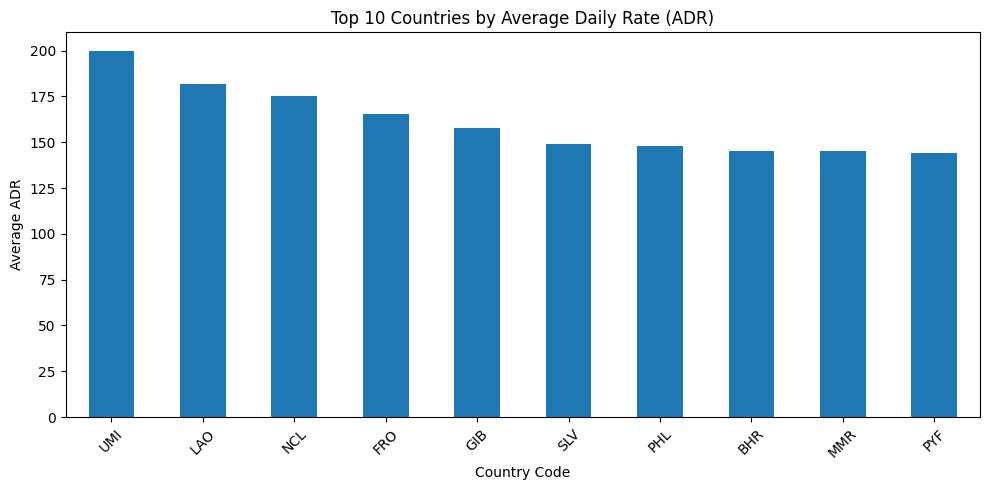

In [ ]:
# adr= Average Daily Rate
revenue = df.groupby('country')['adr'].mean().sort_values(ascending=False).head(10)
revenue.plot(kind='bar', figsize=(10, 5))
plt.title("Top 10 Countries by Average Daily Rate (ADR)")
plt.ylabel("Average ADR")
plt.xlabel("Country Code")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='revenue', ylabel='Count'>

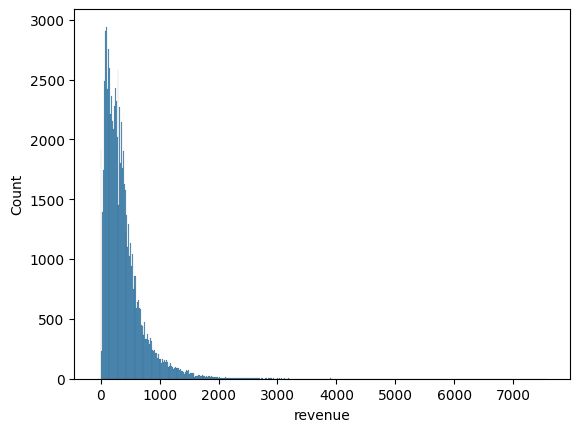

In [114]:
sns.histplot(df['revenue'])

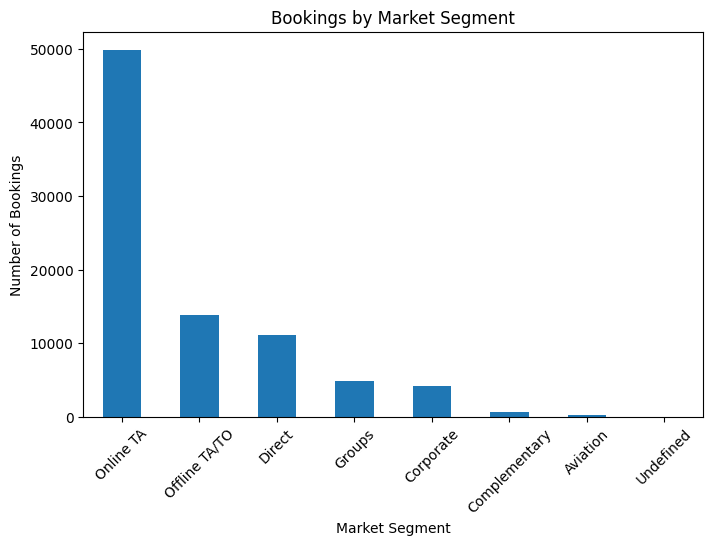

In [116]:
# Booking count by market segment
market_segment_counts = df['market_segment'].value_counts()

plt.figure(figsize=(8, 5))
market_segment_counts.plot(kind='bar')
plt.title('Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

<ipython-input-119-d2e62e82383f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_bookings = df.groupby('arrival_date_month')['hotel'].count()


Text(0, 0.5, 'Number of Bookings')

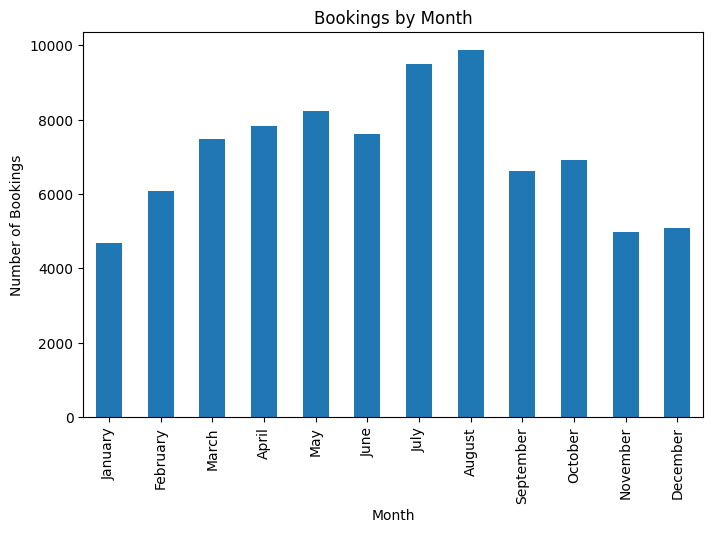

In [119]:

monthly_bookings = df.groupby('arrival_date_month')['hotel'].count()

plt.figure(figsize=(8, 5))
monthly_bookings.plot(kind='bar')
plt.title('Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')


<ipython-input-120-77eac310d41d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='lead_time', data=df, palette=['green', 'red'])


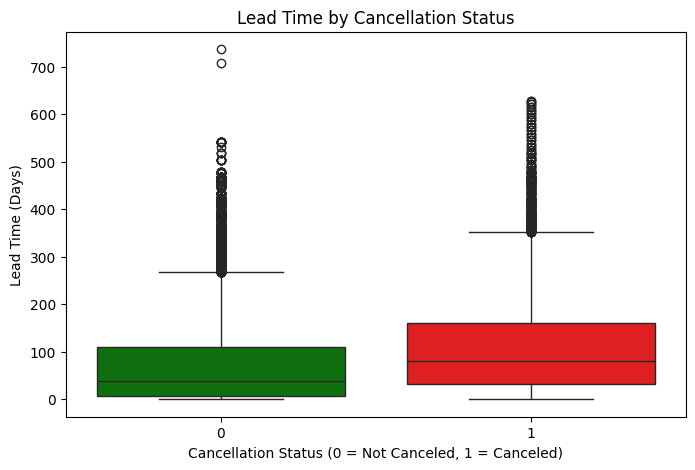

In [120]:
lead_time_stats = df.groupby('is_canceled')['lead_time'].describe()

plt.figure(figsize=(8, 5))
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette=['green', 'red'])
plt.title('Lead Time by Cancellation Status')
plt.xlabel('Cancellation Status (0 = Not Canceled, 1 = Canceled)')
plt.ylabel('Lead Time (Days)')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Groups'),
  Text(5, 0, 'Offline TA/TO'),
  Text(6, 0, 'Online TA'),
  Text(7, 0, 'Undefined')])

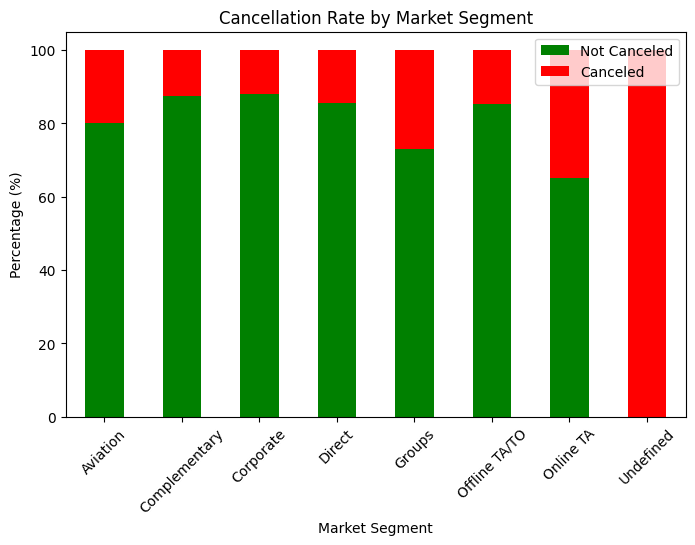

In [121]:
cancel_by_segment = pd.crosstab(df['market_segment'], df['is_canceled'], normalize='index') * 100

cancel_by_segment.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 5))
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Percentage (%)')
plt.legend(['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)


<ipython-input-122-977fcc377f97>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='market_segment', y='adr', data=df, palette='Set2')


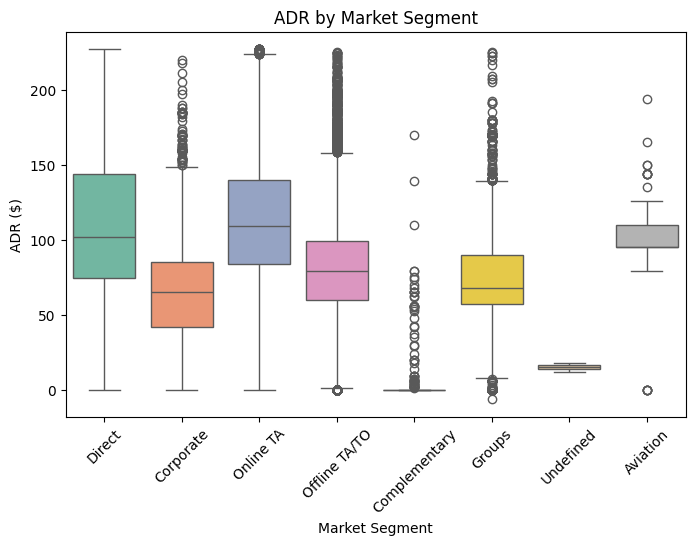

In [122]:
adr_by_segment = df.groupby('market_segment')['adr'].describe()


# Boxplot to visualize ADR by market segment
plt.figure(figsize=(8, 5))
sns.boxplot(x='market_segment', y='adr', data=df, palette='Set2')
plt.title('ADR by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('ADR ($)')
plt.xticks(rotation=45)


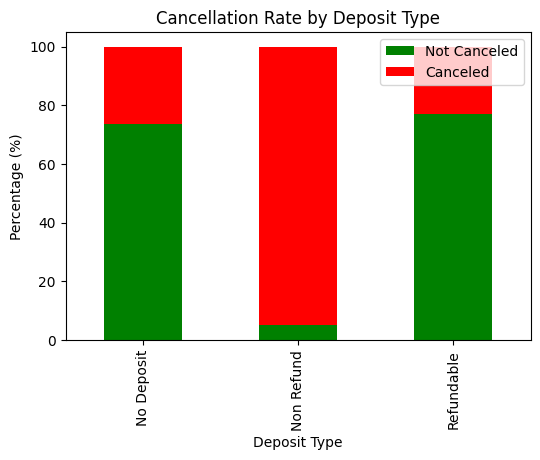

In [123]:
cancel_by_deposit = pd.crosstab(df['deposit_type'], df['is_canceled'], normalize='index') * 100


cancel_by_deposit.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(6, 4))
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Percentage (%)')
plt.legend(['Not Canceled', 'Canceled'])


<ipython-input-124-f62df1d6681a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='customer_type', y='adr', data=df, palette='Set3')


Text(0, 0.5, 'ADR ($)')

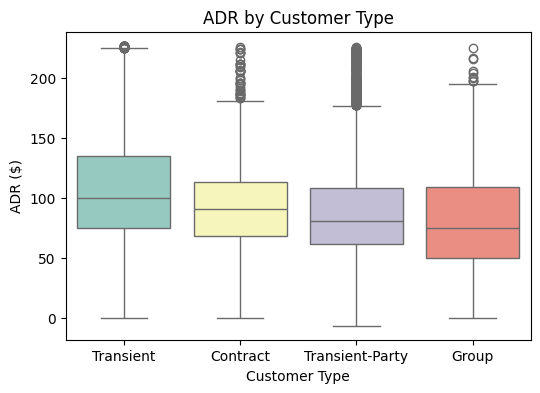

In [124]:
adr_by_customer = df.groupby('customer_type')['adr'].describe()


# Boxplot to visualize ADR by customer type
plt.figure(figsize=(6, 4))
sns.boxplot(x='customer_type', y='adr', data=df, palette='Set3')
plt.title('ADR by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('ADR ($)')


In [ ]:
top_c=df['country'].value_counts().head(5)
top_c

,count
country,
PRT,27016
GBR,10253
FRA,8642
ESP,6790
DEU,5334


In [ ]:
country=top_c.index

df_country=df[df['country'].isin(country)]

In [ ]:
df_country

In [ ]:
people_by_country_month = df_country.groupby(['country', 'arrival_date_month'])['total_guests'].sum().reset_index()

In [ ]:
people_by_country_month.sort_values(by=['country', 'arrival_date_month'])

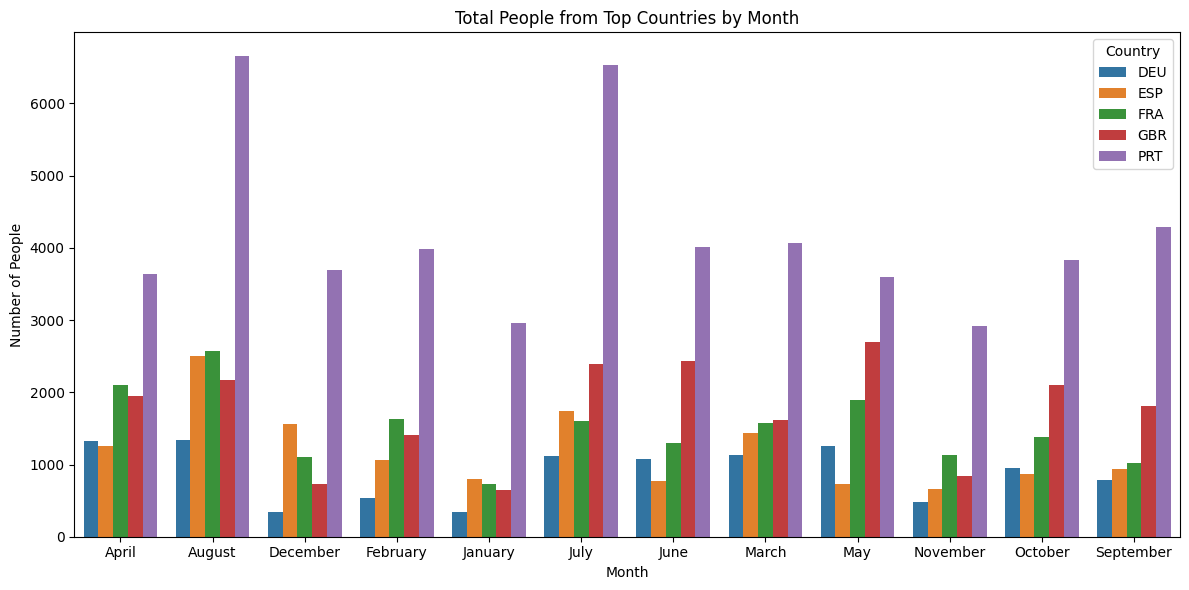

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=people_by_country_month,
            x='arrival_date_month',
            y='total_guests',
            hue='country')

plt.title('Total People from Top Countries by Month')
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.legend(title='Country')
plt.tight_layout()


MULTIVARIATE ANALYSIS

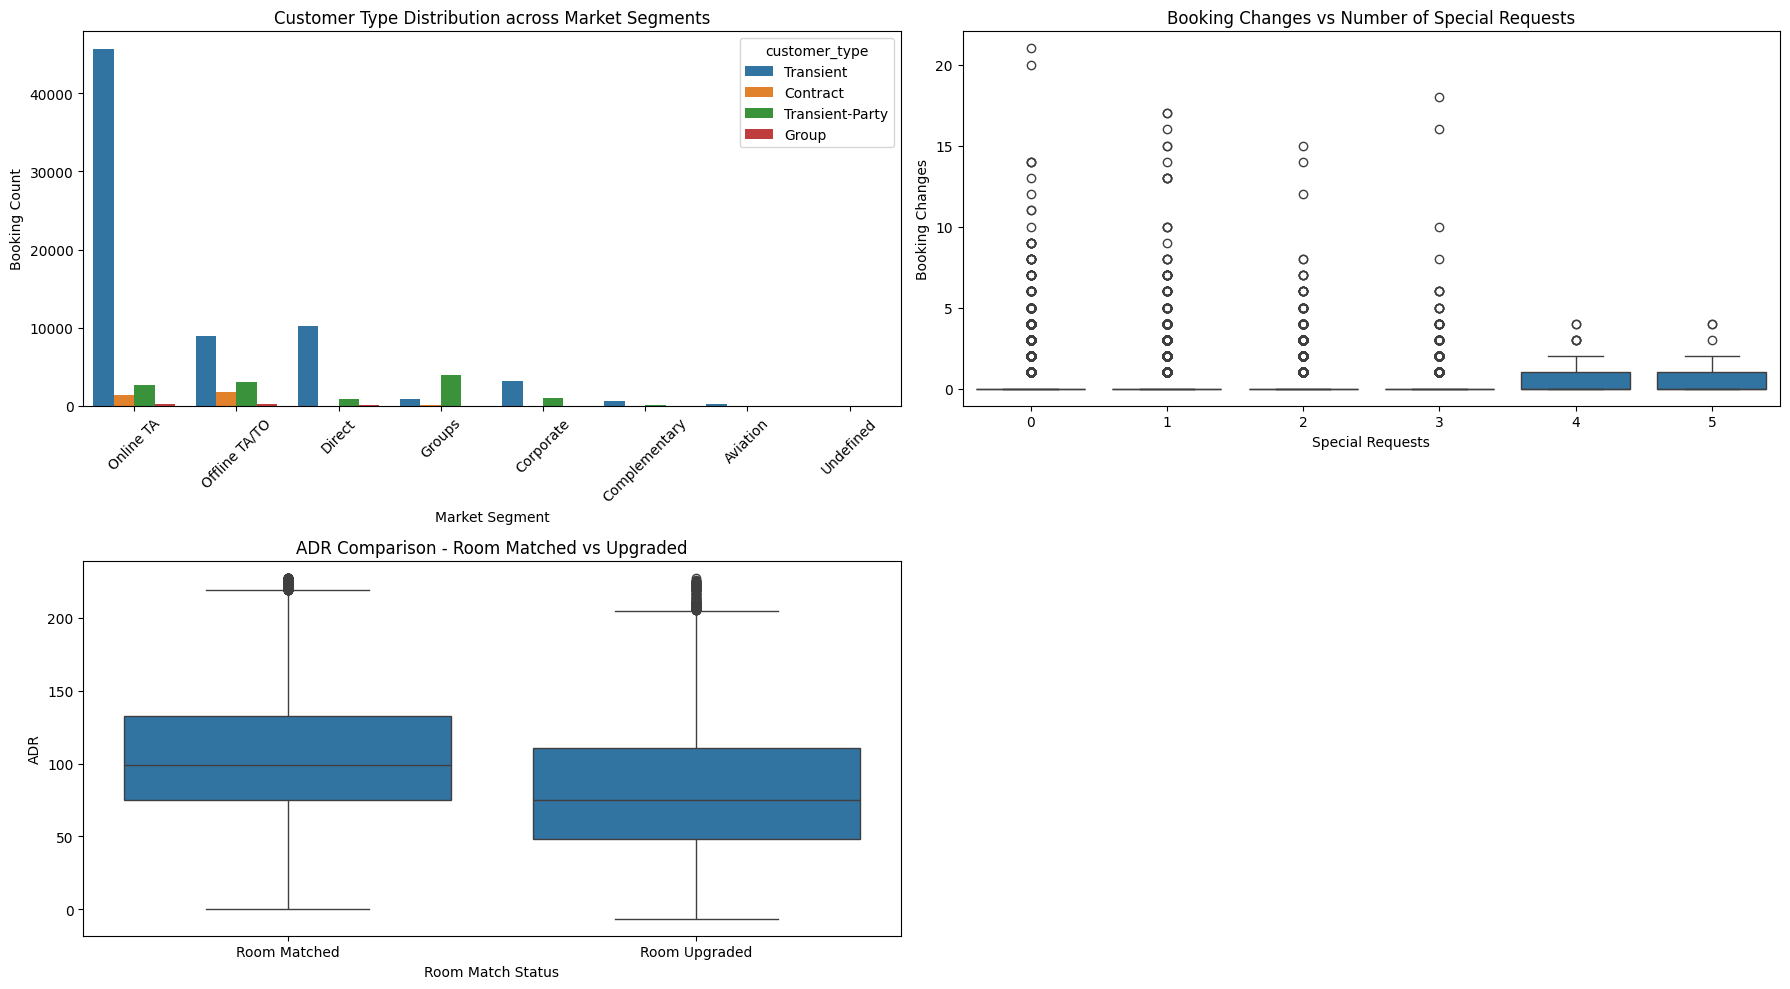

In [270]:
plt.figure(figsize = (18,10))

## 1. Customer Type per Market Segment

plt.subplot(2,2,1)
sns.countplot(data=df, x='market_segment', hue='customer_type', order=df['market_segment'].value_counts().index)
plt.title('Customer Type Distribution across Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Booking Count')
plt.xticks(rotation=45)


## 2. Booking Changes vs Total no. of special requests

plt.subplot(2,2,2)
sns.boxplot(data=df, x='total_of_special_requests', y='booking_changes')
plt.title('Booking Changes vs Number of Special Requests')
plt.xlabel('Special Requests')
plt.ylabel('Booking Changes')

## 3. ADR vs Room Mismatch

plt.subplot(2,2,3)
sns.boxplot(data=df, x='room_mismatch', y='adr')
plt.xticks([0, 1], ['Room Matched', 'Room Upgraded'])
plt.title('ADR Comparison - Room Matched vs Upgraded')
plt.xlabel('Room Match Status')
plt.ylabel('ADR')

plt.tight_layout()
plt.show()

Time series

In [268]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status_date,total_nights,total_guests,arrival_date,meal_int,revenue,upgrade,lead_time_category,room_change,room_mismatch
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,2015-07-01,0,2,2015-07-01,0,0.0,0,Long (>60),False,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,2015-07-01,0,2,2015-07-01,0,0.0,0,Long (>60),False,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,2015-07-02,1,1,2015-07-01,0,75.0,1,Short (0-30),True,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,2015-07-02,1,1,2015-07-01,0,75.0,0,Short (0-30),False,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,2015-07-03,2,2,2015-07-01,0,196.0,0,Short (0-30),False,0


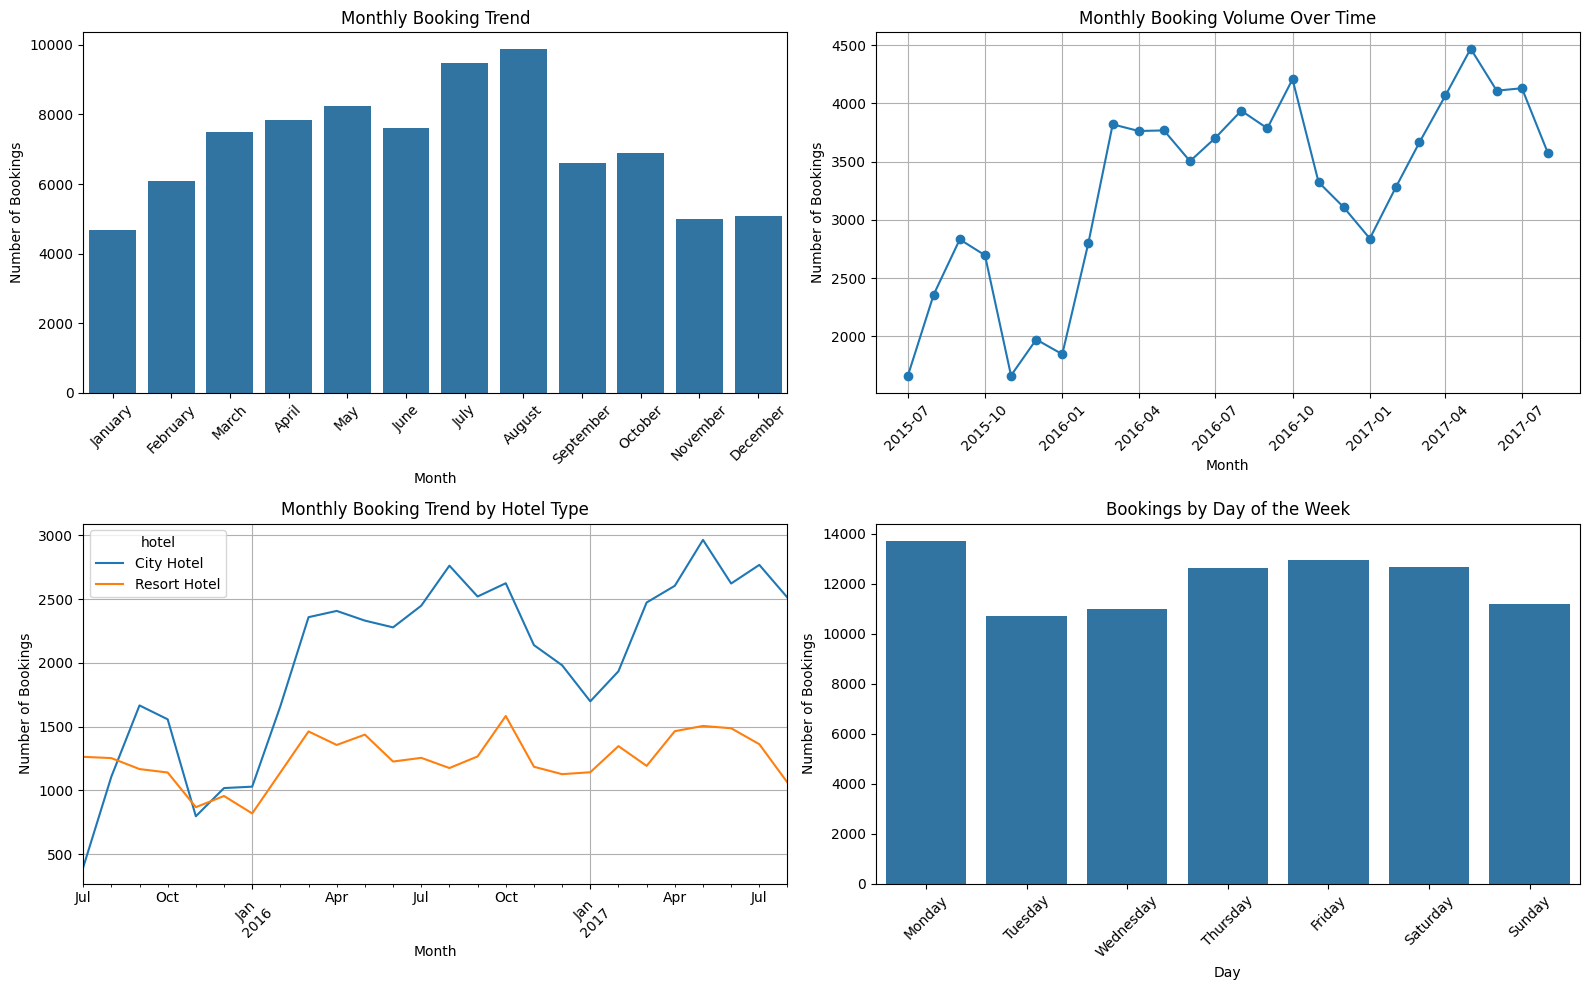

In [269]:
plt.figure(figsize=(16,10))  # Increase figure size for 2x2 layout

## 1. Monthly Booking Trend
df['arrival_month'] = df['arrival_date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.subplot(2,2,1)
sns.countplot(data=df, x='arrival_month', order=month_order)
plt.title('Monthly Booking Trend')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

## 2. Monthly Booking Volume (Time Series)
monthly_bookings = df.groupby(df['arrival_date'].dt.to_period('M')).size()
monthly_bookings.index = monthly_bookings.index.to_timestamp()

plt.subplot(2,2,2)
plt.plot(monthly_bookings.index, monthly_bookings.values, marker='o', linestyle='-')
plt.title('Monthly Booking Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(True)

## 3. Monthly Booking Trend by Hotel
df['month'] = df['arrival_date'].dt.to_period('M')
monthly_trend_hotel = df.groupby(['month', 'hotel']).size().unstack()
monthly_trend_hotel.index = monthly_trend_hotel.index.to_timestamp()

ax3 = plt.subplot(2,2,3)
monthly_trend_hotel.plot(ax=ax3)
plt.title('Monthly Booking Trend by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(rotation=45)

## 4. Bookings by Day of the Week
df['dayofweek'] = df['arrival_date'].dt.day_name()

plt.subplot(2,2,4)
sns.countplot(data=df, x='dayofweek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Bookings by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 3. Correlation Analysis

In [180]:
numerical_df = df.select_dtypes(include='number')
numerical_df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights', 'total_guests', 'meal_int',
       'revenue', 'upgrade'],
      dtype='object')

In [ ]:
correlation_matrix = numerical_df.corr(method='pearson')
correlation_matrix

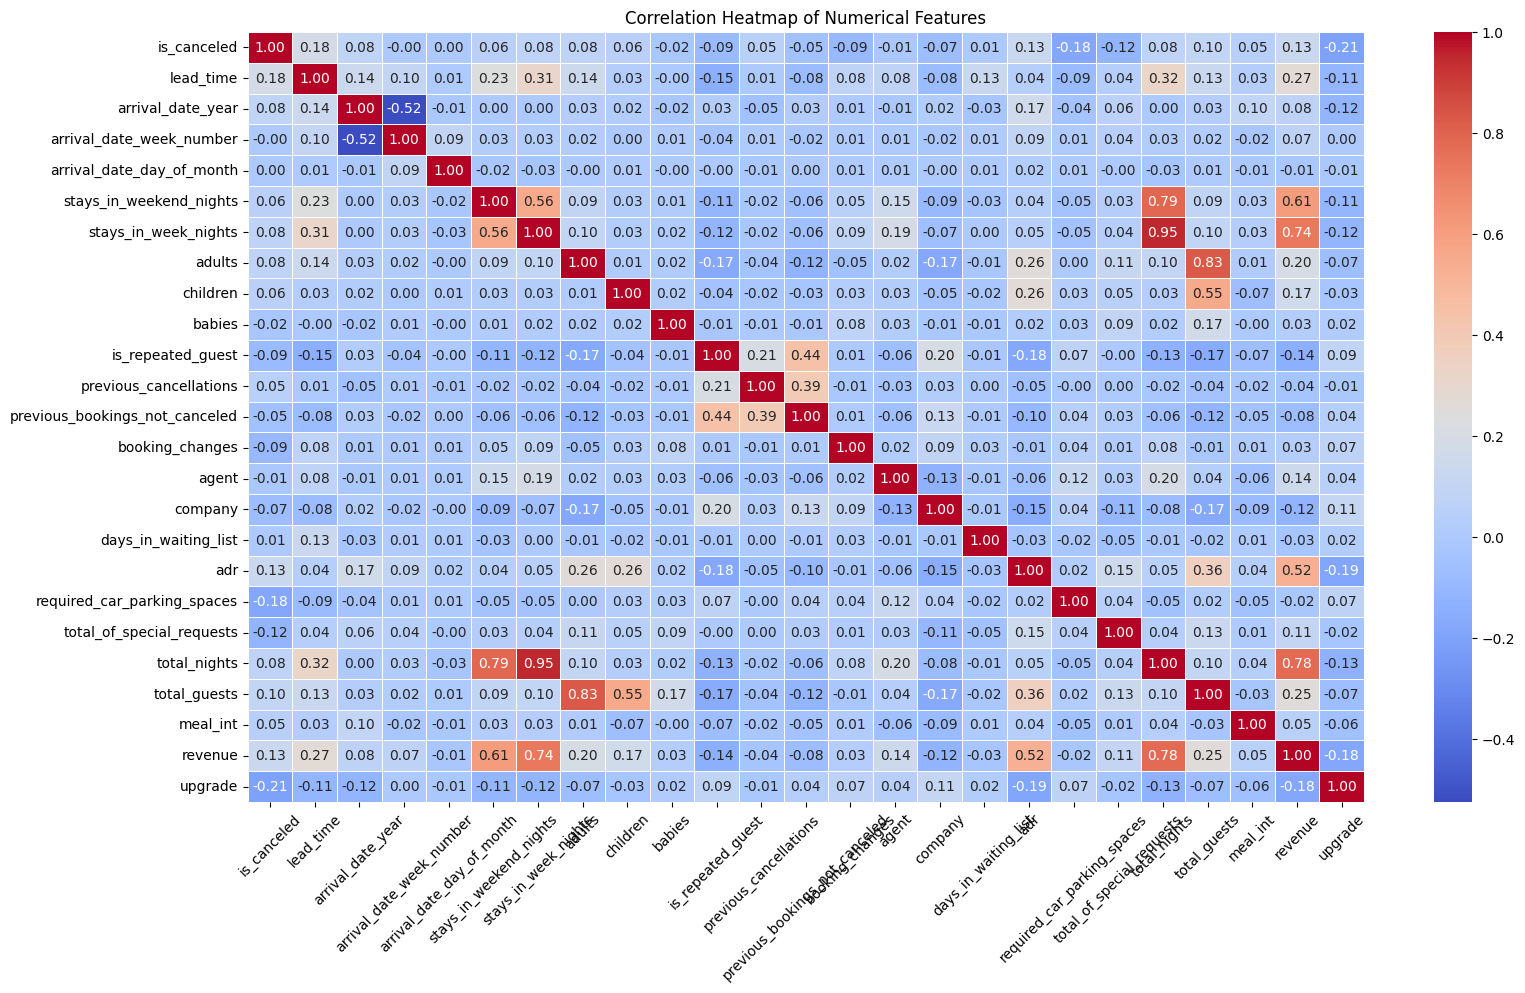

In [182]:
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.xticks(rotation=45)
plt.show()

## Hypothesis 1: There is no difference in ADR between bookings made through Online TA and Direct channels
H0: The mean ADR for Online TA bookings equals the mean ADR for Direct bookings Ho=OnlineTA = Direct
H1: The mean ADR for Online TA bookings differs from the mean ADR for Direct bookings
H1= OnlineTA != Direct

In [125]:
adr_online_ta = df[df['market_segment'] == 'Online TA']['adr']
adr_direct = df[df['market_segment'] == 'Direct']['adr']

In [135]:
zscore,pvalue=ssw.ztest(adr_online_ta,adr_direct,alternative='two-sided')

In [138]:
pvalue

np.float64(1.617741406058245e-27)

In [137]:
if pvalue < 0.05:
  print("we reject")
else:
  print("we do not reject")

we reject


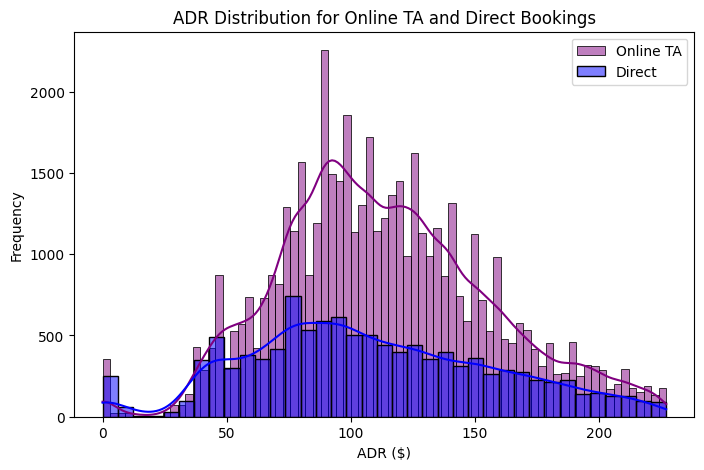

In [140]:
plt.figure(figsize=(8, 5))
sns.histplot(adr_online_ta, color='purple', label='Online TA', kde=True)
sns.histplot(adr_direct, color='blue', label='Direct', kde=True)
plt.title('ADR Distribution for Online TA and Direct Bookings')
plt.xlabel('ADR ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Hypothesis 2: Room upgrades are independent of lead time
H0: Room upgrades (whether assigned_room_type differs from reserved_room_type) are independent of lead time.

H1: Room upgrades are not independent of lead time.
Test: Chi-square degree of association

In [141]:
# Create upgrade variable (1 if assigned_room_type > reserved_room_type, 0 otherwise)

df['upgrade'] = df.apply(lambda x: 1 if x['assigned_room_type'] > x['reserved_room_type'] else 0, axis=1)

In [154]:
upgraded=df[df['upgrade']==1]['lead_time']
not_upgraded=df[df['upgrade']==0]['lead_time']

In [161]:
ttest_ind(upgraded,not_upgraded)

TtestResult(statistic=np.float64(-32.06201701360653), pvalue=np.float64(3.2918106783354288e-224), df=np.float64(84887.0))

In [156]:
p_value

np.float64(0.0)

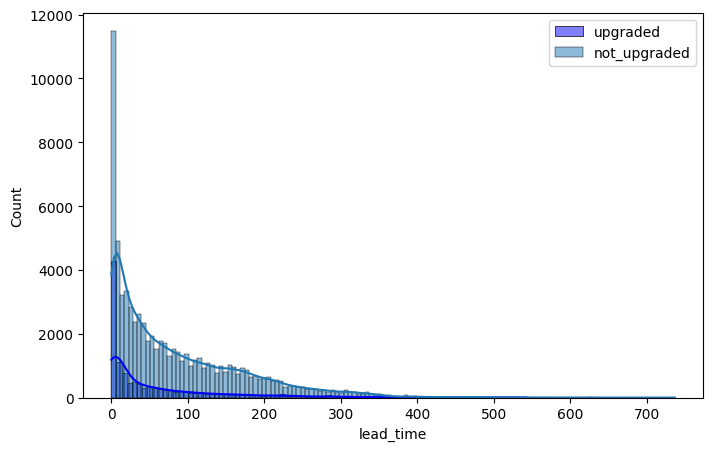

In [197]:
plt.figure(figsize=(8, 5))
sns.histplot(upgraded,color='blue', label='upgraded', kde=True)
sns.histplot(not_upgraded, label='not_upgraded', kde=True)
plt.legend()
plt.show()

# Hypothesis 3: Average stay duration does not differ between customer types
H0: The mean stay duration for Transient customers equals the mean stay duration for Contract customers
H1: The mean stay duration for Transient customers differs from the mean stay duration for Contract customers


In [162]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [163]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_guests,arrival_date,meal_int,revenue,upgrade,lead_time_category
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,0,2,2015-07-01,0,0.0,0,Long (>60)
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,0,2,2015-07-01,0,0.0,0,Long (>60)
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,1,1,2015-07-01,0,75.0,1,Short (0-30)
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,1,1,2015-07-01,0,75.0,0,Short (0-30)
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,2,2,2015-07-01,0,196.0,0,Short (0-30)


In [176]:
stay_transient = df[df['customer_type'] == 'Transient'][['total_nights']].assign(customer_type='Transient')
stay_contract = df[df['customer_type'] == 'Contract'][['total_nights']].assign(customer_type='Contract')
stay_party = df[df['customer_type'] == 'Transient-Party'][['total_nights']].assign(customer_type='Transient-Party')
stay_group = df[df['customer_type'] == 'Group'][['total_nights']].assign(customer_type='Group')


df_total = pd.concat([stay_transient, stay_contract, stay_party, stay_group])

In [169]:
from scipy.stats import f_oneway

In [173]:
f_stat, p_value = f_oneway(
    stay_transient['total_nights'],
    stay_contract['total_nights'],
    stay_party['total_nights'],
    stay_group['total_nights']
)

In [174]:
p_value

np.float64(0.0)

In [175]:
if p_value < 0.05:
    print("Reject H0: ")
else:
    print("Fail to reject H0: ")

Reject H0: 


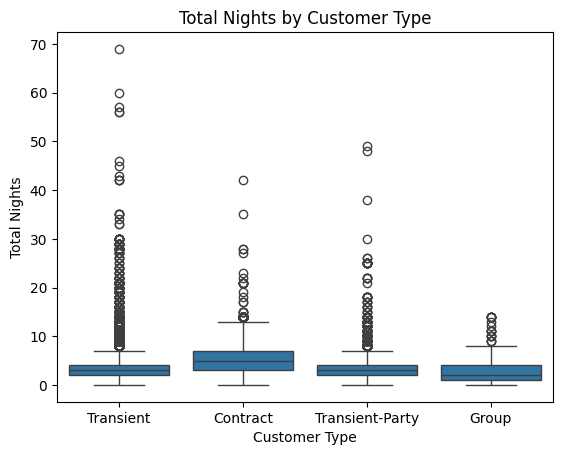

In [177]:
sns.boxplot(data=df_total, x='customer_type', y='total_nights')
plt.title("Total Nights by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Nights")

### Key Business Questions

What influences ADR the most?

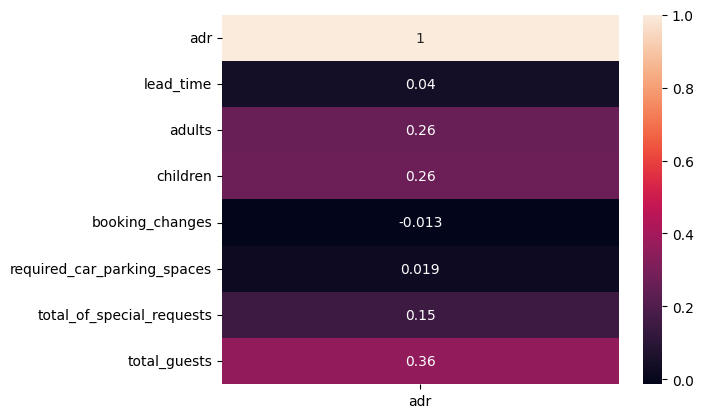

In [179]:
num_cols = ['adr', 'lead_time', 'adults', 'children', 'booking_changes',
            'required_car_parking_spaces', 'total_of_special_requests',
            'total_guests']

corr = df[num_cols].corr()

sns.heatmap(corr[['adr']], annot=True)
plt.show()

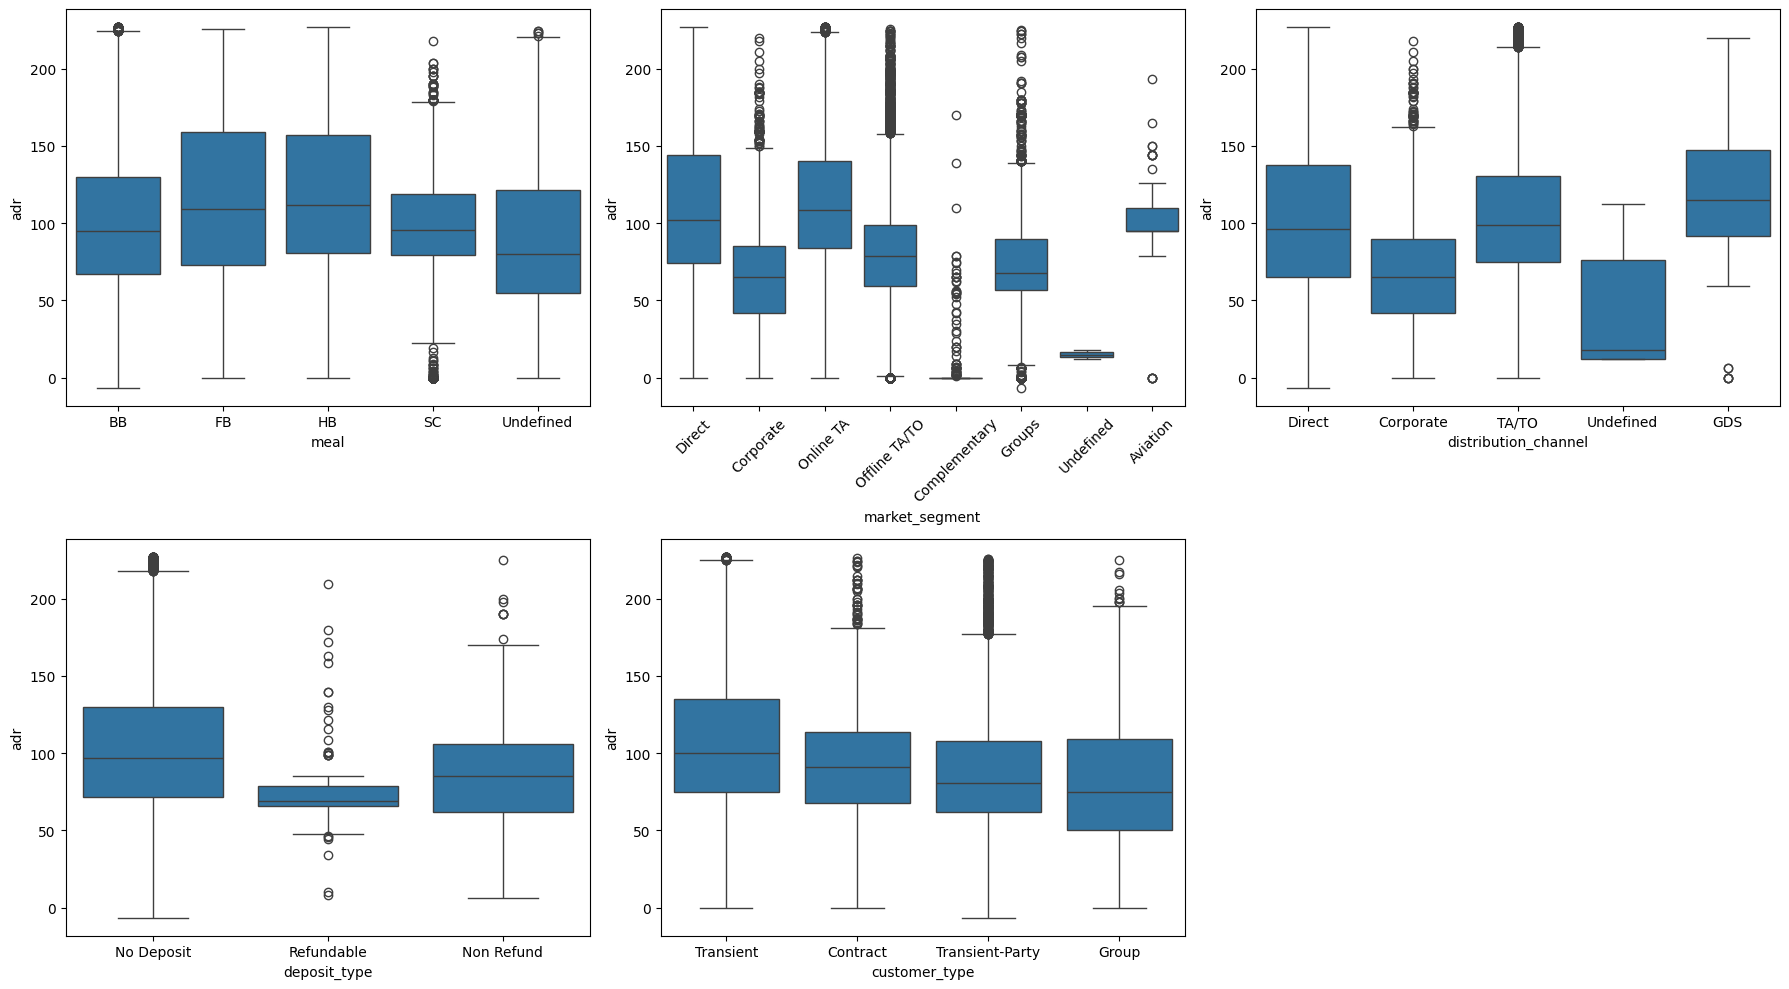

In [183]:
## Correlation of ADR with categorical columns

plt.figure(figsize=(18,10))

## 1. Meal vs ADR

plt.subplot(2,3,1)
sns.boxplot(x=df['meal'], y=df['adr'])

## 2. Market Segment vs ADR

plt.subplot(2,3,2)
sns.boxplot(x=df['market_segment'], y=df['adr'])
plt.xticks(rotation=45)

## 3. Distribution Channel vs ADR

plt.subplot(2,3,3)
sns.boxplot(x=df['distribution_channel'], y=df['adr'])

## 4. Deposit Type vs ADR

plt.subplot(2,3,4)
sns.boxplot(x=df['deposit_type'], y=df['adr'])

## 5. Customer Type vs ADR

plt.subplot(2,3,5)
sns.boxplot(x=df['customer_type'], y=df['adr'])

plt.tight_layout()
plt.show()

Do guests who book earlier tend to request more changes?


In [187]:
from scipy.stats import pearsonr

In [191]:
t_stat, p_value = pearsonr(df['lead_time'], df['booking_changes'])

if p_value < 0.05:
    print('Reject Null Hypothesis.')
else:
    print('Do not reject Null Hypothesis.')

Reject Null Hypothesis.


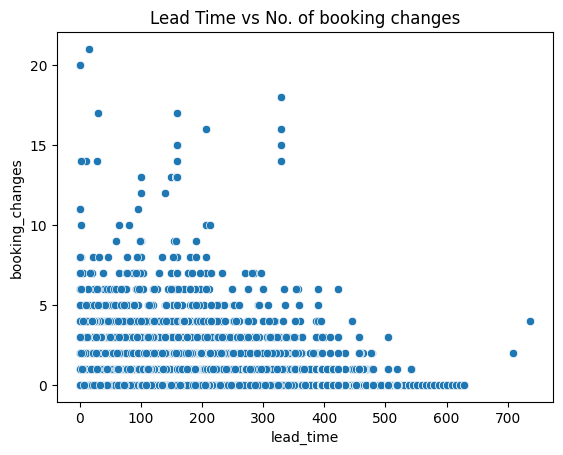

In [192]:
sns.scatterplot(x=df['lead_time'],y=df['booking_changes'])
plt.title('Lead Time vs No. of booking changes')
plt.show()

3.Are there pricing or booking differences across countries?


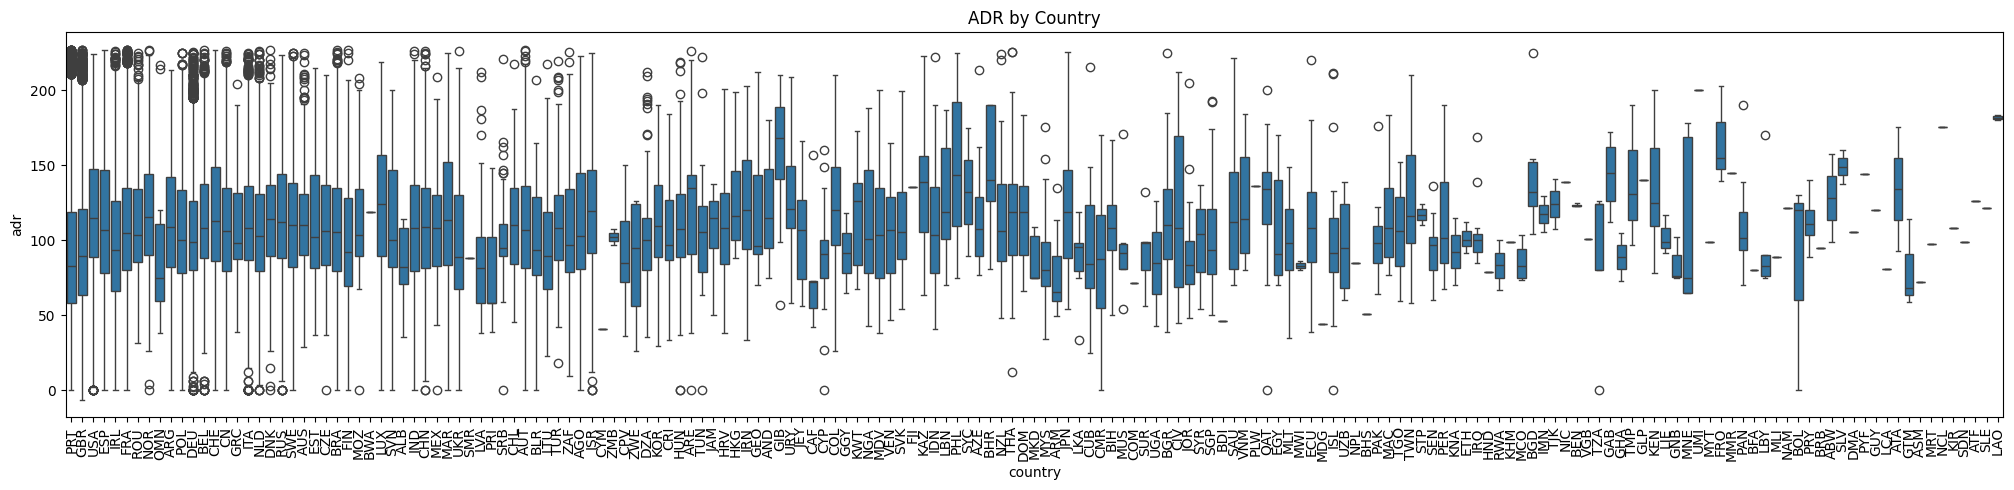

Cancellation Rate by Country (%): is_canceled           0           1
country                            
ABW          100.000000    0.000000
AGO           44.512195   55.487805
ALB           81.818182   18.181818
AND            0.000000  100.000000
ARE           15.555556   84.444444
...                 ...         ...
VGB            0.000000  100.000000
VNM           75.000000   25.000000
ZAF           62.337662   37.662338
ZMB           50.000000   50.000000
ZWE           50.000000   50.000000

[175 rows x 2 columns]


In [203]:
# ADR by country
plt.figure(figsize=(25, 5))
sns.boxplot(x='country', y='adr', data=df)
plt.title('ADR by Country')
plt.xticks(rotation=90)
plt.show()

# Cancellation rate by country
cancel_by_country = pd.crosstab(df['country'], df['is_canceled'], normalize='index') * 100
print("Cancellation Rate by Country (%):", cancel_by_country)

4. Is There a Pattern in Room Upgrades or Reassignment?

In [204]:
df['room_change'] = df['reserved_room_type'] != df['assigned_room_type']
print("Room Change Frequency:", df['room_change'].value_counts())

# Cross-tab with market segment
print(pd.crosstab(df['market_segment'], df['room_change']))

Room Change Frequency: room_change
False    71922
True     12967
Name: count, dtype: int64
room_change     False  True 
market_segment              
Aviation          207     20
Complementary     466    236
Corporate        2883   1319
Direct           9154   2010
Groups           3695   1220
Offline TA/TO   10890   2945
Online TA       44625   5217
Undefined           2      0


In [206]:
df['room_mismatch'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)

upgraded = df[df['room_mismatch'] == 1]['lead_time']
not_upgraded = df[df['room_mismatch'] == 0]['lead_time']

t_stat, p_val = ttest_ind(upgraded, not_upgraded, equal_var=False)

if p_value < 0.05:
    print('Reject Null Hypothesis.')
else:
    print('Do not reject Null Hypothesis.')

Reject Null Hypothesis.


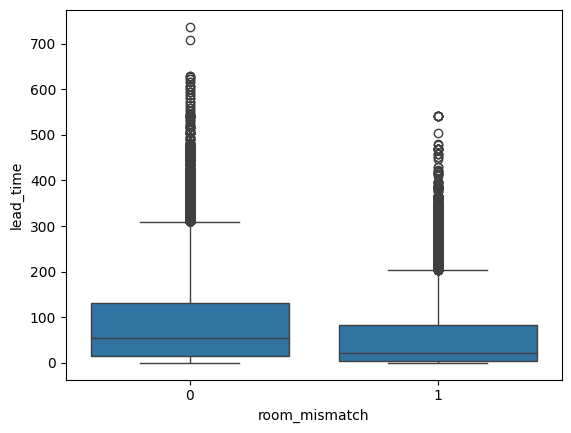

In [207]:
sns.boxplot(x='room_mismatch', y='lead_time', data=df)
plt.show()

5. Are Reserved Room Types Consistently Matched with Assigned Room Types?

In [208]:
upgraded = df[df['room_mismatch'] == 1]['lead_time']
not_upgraded = df[df['room_mismatch'] == 0]['lead_time']

t_stat, p_val = ttest_ind(upgraded, not_upgraded, equal_var=False)

if p_value < 0.05:
    print('Reject Null Hypothesis.')
else:
    print('Do not reject Null Hypothesis.')

Reject Null Hypothesis.


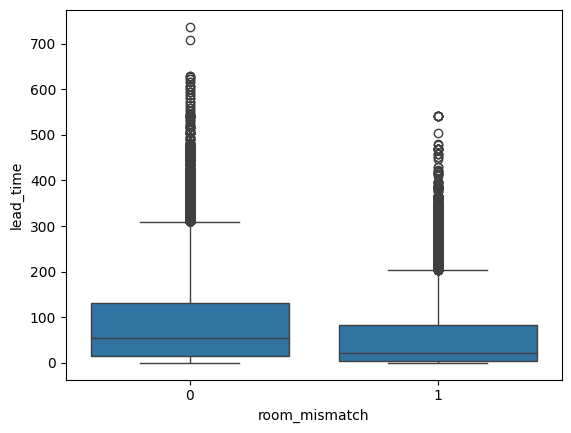

In [209]:
sns.boxplot(x='room_mismatch', y='lead_time', data=df)
plt.show()

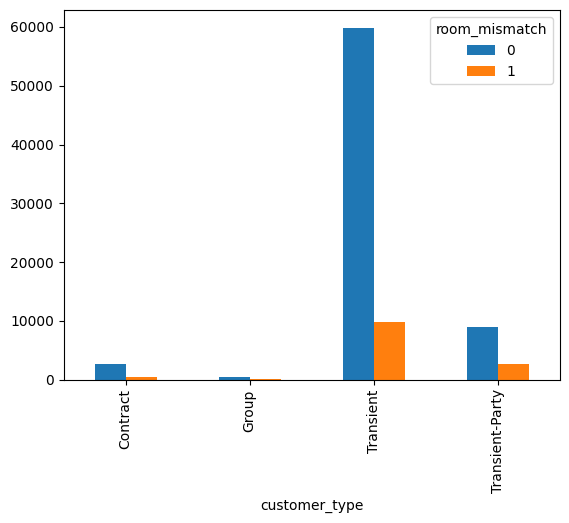

In [211]:
room_cust_ct = pd.crosstab(df['customer_type'], df['room_mismatch'])
room_cust_ct.plot(kind='bar')
plt.show()

5. Are reserved room types consistently matched with assigned room types?

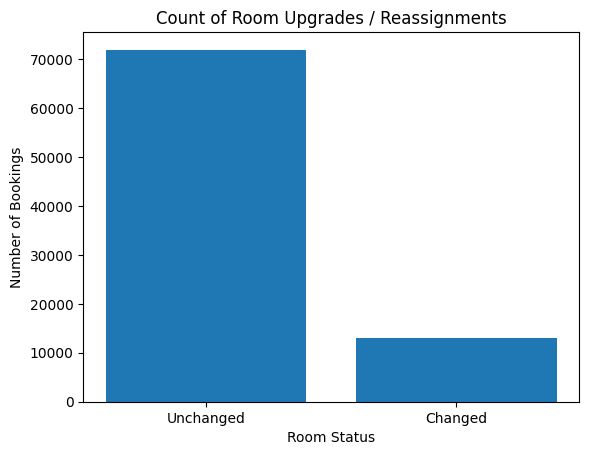

In [212]:
plt.bar(df['room_mismatch'].value_counts().index, df['room_mismatch'].value_counts())
plt.xticks([0,1], ['Unchanged', 'Changed'])
plt.xlabel('Room Status')
plt.ylabel('Number of Bookings')
plt.title('Count of Room Upgrades / Reassignments')
plt.show()

In [ ]:
match_rate = df['room_mismatch'].value_counts(normalize=True) * 100
print('Percent of Bookings where Reserved Room and Assigned Room were the same: ',match_rate.iloc[0])
print('Percent of Bookings where Rooms were changed: ',match_rate.iloc[1])

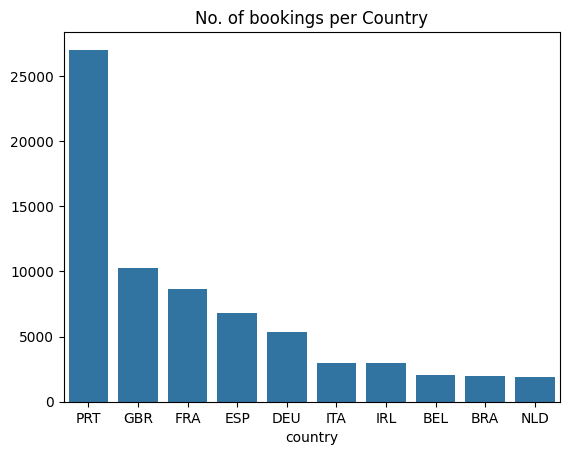

In [213]:
## Most common countries.

top_ten_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_ten_countries.index, y=top_ten_countries.values)
plt.title('No. of bookings per Country')
plt.show()

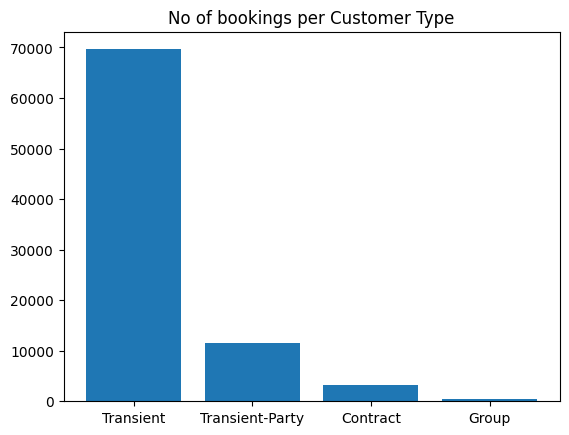

In [214]:
## Most Common Customer Type

plt.bar(df['customer_type'].value_counts().index,df['customer_type'].value_counts())
plt.title('No of bookings per Customer Type')
plt.show()

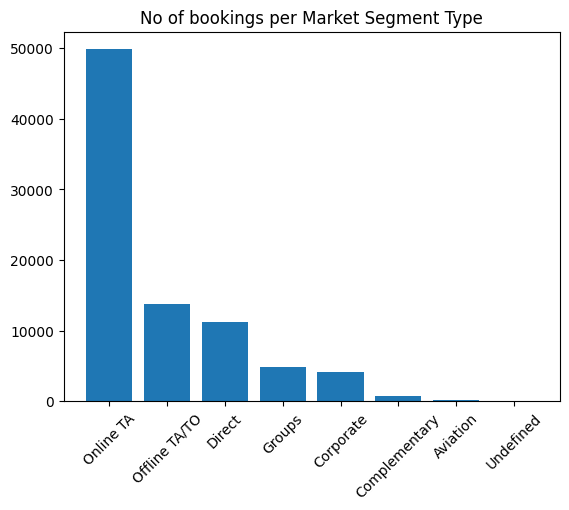

In [215]:

plt.bar(df['market_segment'].value_counts().index,df['market_segment'].value_counts())
plt.title('No of bookings per Market Segment Type')
plt.xticks(rotation=45)
plt.show()

7. Are there patterns in guest types (e.g., transient vs. corporate) that influence booking behavior?

In [218]:
df['is_canceled'] = df['is_canceled'].astype(int)
customer_stats = df.groupby('customer_type')[['adr', 'lead_time', 'is_canceled']].mean()
customer_counts = df['customer_type'].value_counts()
customer_stats['booking_count'] = customer_counts
customer_stats = customer_stats.sort_values(by='adr', ascending=False).reset_index()
customer_stats

,customer_type,adr,lead_time,is_canceled,booking_count
0,Transient,105.069001,73.475905,0.297659,69640
1,Contract,92.659398,109.261077,0.162894,3137
2,Transient-Party,85.493946,113.687338,0.152790,11578
3,Group,80.882584,52.443820,0.093633,534


Text(0.5, 0, 'Customer Type')

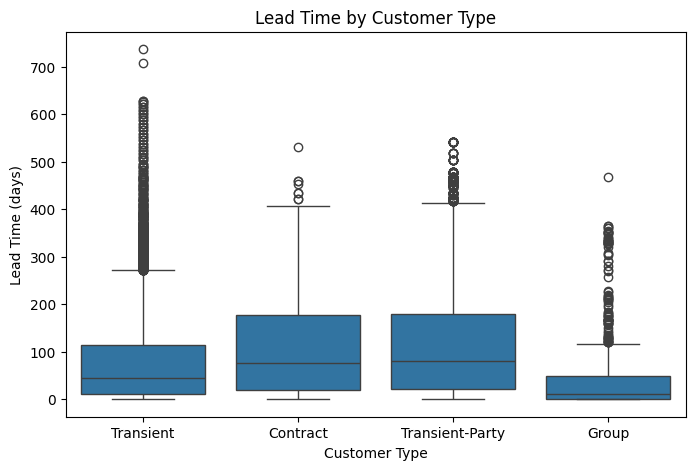

In [220]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='customer_type', y='lead_time', data=df)
plt.title("Lead Time by Customer Type")
plt.ylabel("Lead Time (days)")
plt.xlabel("Customer Type")

Text(0.5, 1.0, 'Lead Time by Top 5 Guest Countries')

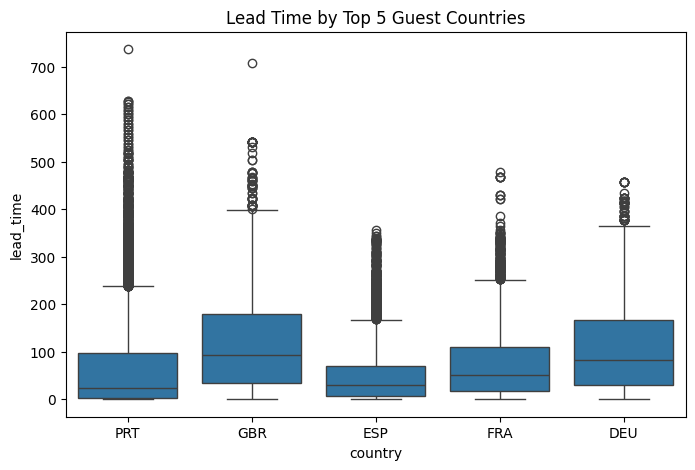

In [221]:
top_countries = df['country'].value_counts().head(5).index
df_top_countries = df[df['country'].isin(top_countries)]
plt.figure(figsize=(8, 5))
sns.boxplot(x='country', y='lead_time', data=df_top_countries)
plt.title("Lead Time by Top 5 Guest Countries")

9. Are longer lead times associated with fewer changes or cancellations?

Text(0.5, 1.0, 'Lead Time vs Booking Changes')

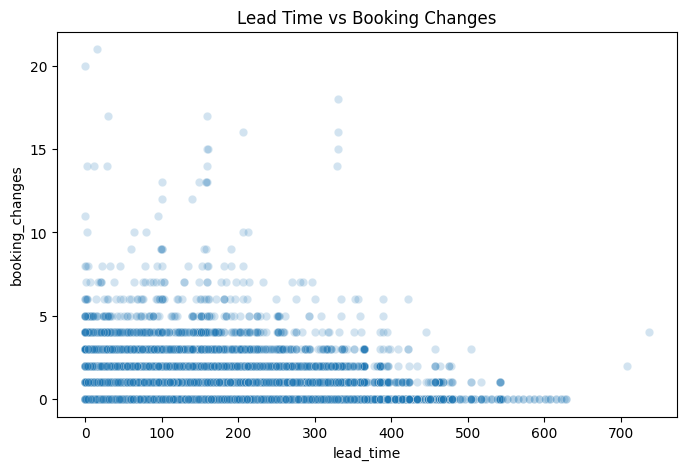

In [222]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='lead_time', y='booking_changes', data=df, alpha=0.2)
plt.title("Lead Time vs Booking Changes")

<ipython-input-223-1c6084d6be74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='pastel')


Text(0, 0.5, 'Lead Time (days)')

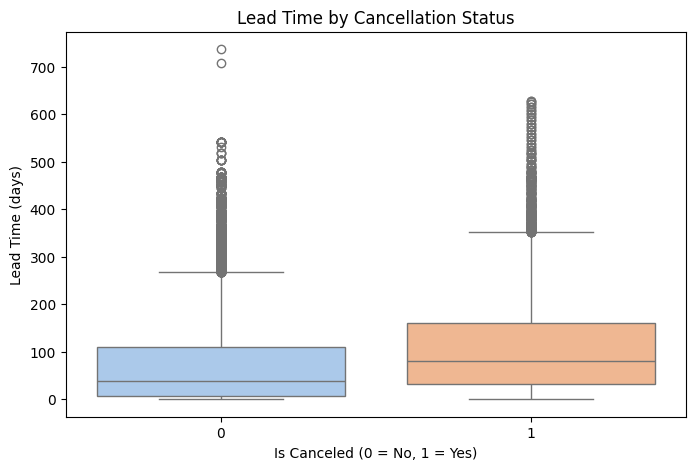

In [223]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='pastel')
plt.title("Lead Time by Cancellation Status")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Lead Time (days)")

In [225]:

stay_by_customer_type = df.groupby('customer_type')['total_nights'].mean().sort_values(ascending=False)
stay_by_market_segment = df.groupby('market_segment')['total_nights'].mean().sort_values(ascending=False)
stay_by_customer_type, stay_by_market_segment


(customer_type
 Contract           6.035703
 Transient          3.556936
 Transient-Party    3.335377
 Group              2.941948
 Name: total_nights, dtype: float64,
 market_segment
 Offline TA/TO    4.701265
 Online TA        3.589182
 Aviation         3.572687
 Groups           3.458800
 Direct           3.163114
 Corporate        2.045217
 Complementary    1.669516
 Undefined        1.500000
 Name: total_nights, dtype: float64)

11. How often are guests upgraded or reassigned to a different room type?


In [228]:
room_change_counts = df['room_mismatch'].value_counts()
print(room_change_counts)


room_mismatch
0    71922
1    12967
Name: count, dtype: int64


In [229]:
room_change_pct = df['room_mismatch'].value_counts(normalize=True) * 100
print(room_change_pct)

room_mismatch
0    84.724758
1    15.275242
Name: proportion, dtype: float64


12.	Are guests who make special requests more likely to experience booking changes or longer stays?

In [232]:
# Guests with and without special requests

with_req = df[df['total_of_special_requests'] > 0]
without_req = df[df['total_of_special_requests'] == 0]

## H0: Special requests do not impact number of booking changes.

t_stat, p_value1 = ttest_ind(with_req['booking_changes'], without_req['booking_changes'], equal_var=False)
print(p_value1)

## H0: Special requests do not impact stay duration.

t_stat, p_value2 = ttest_ind(with_req['total_nights'], without_req['total_nights'], equal_var=False)
print(p_value2)

0.020897159099082244
4.2424585108478747e-19


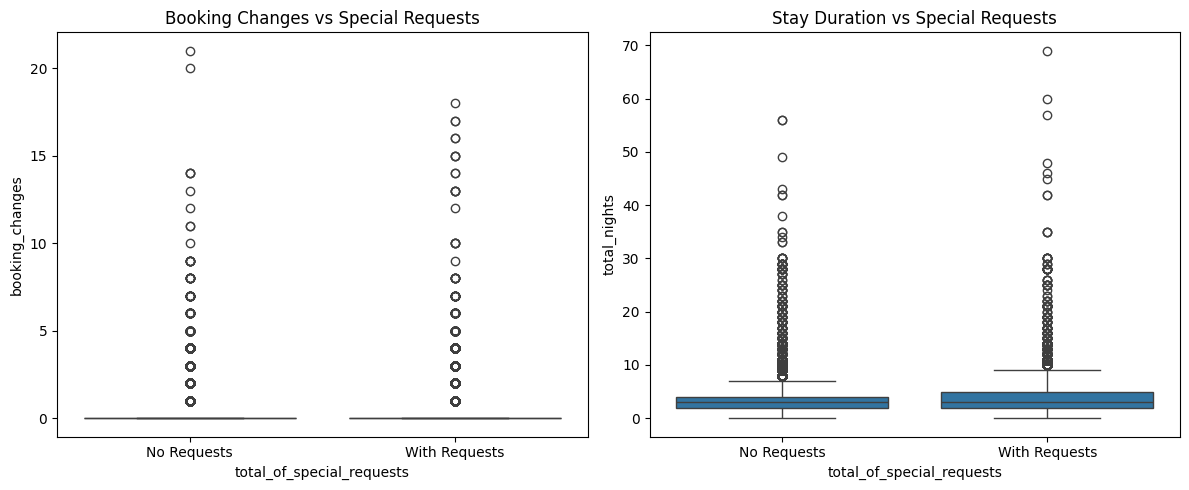

In [234]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=(df['total_of_special_requests'] > 0), y='booking_changes', data=df)
plt.xticks([0,1], ['No Requests', 'With Requests'])
plt.title('Booking Changes vs Special Requests')

plt.subplot(1,2,2)
sns.boxplot(x=(df['total_of_special_requests'] > 0), y='total_nights', data=df)
plt.xticks([0,1], ['No Requests', 'With Requests'])
plt.title('Stay Duration vs Special Requests')

plt.tight_layout()
plt.show()

13.	Do certain market segments or distribution channels show higher booking consistency or revenue?

In [235]:

booking_consistency = df.groupby('market_segment')['booking_changes'].mean().sort_values(ascending=False)
booking_consistency

,booking_changes
market_segment,
Groups,0.636419
Direct,0.400394
Corporate,0.358401
Complementary,0.336182
Aviation,0.255507
Offline TA/TO,0.228984
Online TA,0.205730
Undefined,0.000000


In [236]:
revenue_by_segment = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)
revenue_by_segment

,adr
market_segment,
Online TA,113.214935
Direct,108.220402
Aviation,100.170396
Offline TA/TO,80.730244
Groups,73.723984
Corporate,67.948846
Undefined,15.000000
Complementary,3.049245


In [237]:

booking_consistency_channel = df.groupby('distribution_channel')['booking_changes'].mean().sort_values(ascending=False)
booking_consistency_channel

,booking_changes
distribution_channel,
Corporate,0.428600
Direct,0.417457
TA/TO,0.230006
GDS,0.099448
Undefined,0.000000


In [238]:
# Revenue by channel

revenue_by_channel = df.groupby('distribution_channel')['adr'].mean().sort_values(ascending=False)
revenue_by_channel

,adr
distribution_channel,
GDS,120.317845
TA/TO,104.404624
Direct,101.026039
Corporate,68.312462
Undefined,46.240000


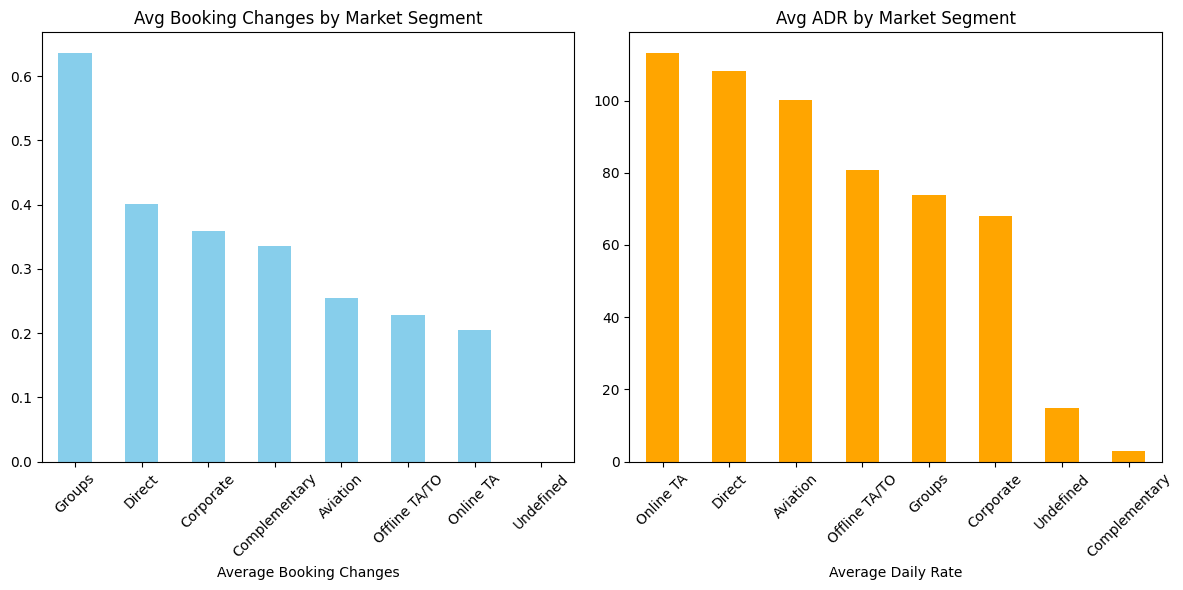

In [239]:
## Market Segment

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
booking_consistency.plot(kind='bar', color='skyblue')
plt.title("Avg Booking Changes by Market Segment")
plt.xlabel("Average Booking Changes")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
revenue_by_segment.plot(kind='bar', color='orange')
plt.title("Avg ADR by Market Segment")
plt.xlabel("Average Daily Rate")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

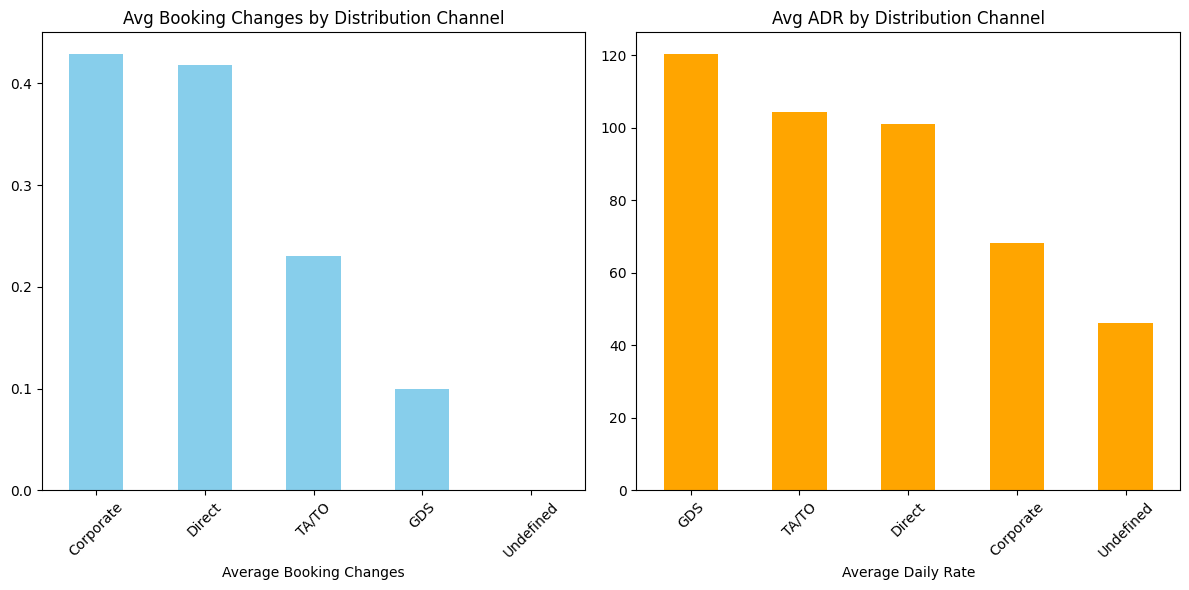

In [240]:

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
booking_consistency_channel.plot(kind='bar', color='skyblue')
plt.title("Avg Booking Changes by Distribution Channel")
plt.xlabel("Average Booking Changes")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
revenue_by_channel.plot(kind='bar', color='orange')
plt.title("Avg ADR by Distribution Channel")
plt.xlabel("Average Daily Rate")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

14.	What factors are most strongly associated with higher ADR?

In [243]:
## Numerical

numerical_cols = ['lead_time', 'booking_changes', 'adults', 'children',
                  'total_nights', 'total_of_special_requests']

# Correlation with ADR

correlations = df[numerical_cols + ['adr']].corr()['adr'].sort_values(ascending=False)
print(correlations)

adr                          1.000000
children                     0.263977
adults                       0.258452
total_of_special_requests    0.152684
total_nights                 0.047468
lead_time                    0.039918
booking_changes             -0.013497
Name: adr, dtype: float64


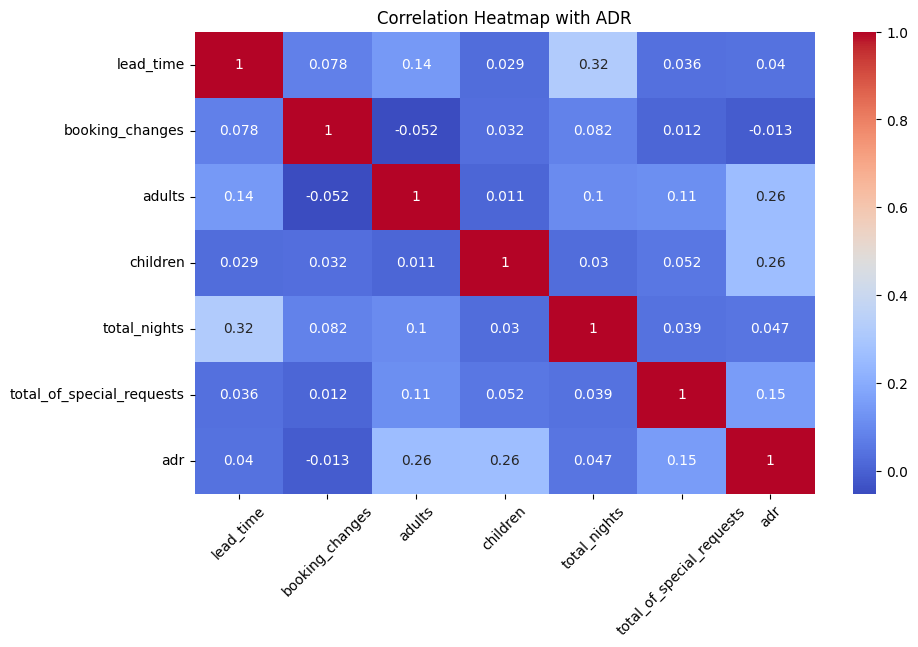

In [244]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols + ['adr']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with ADR")
plt.xticks(rotation=45)
plt.show()

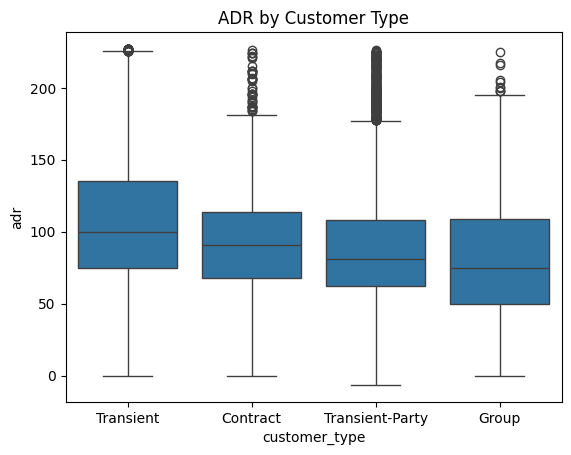

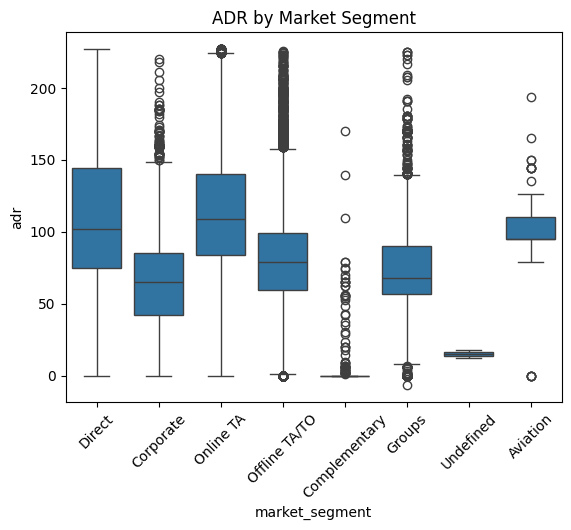

In [245]:
## Categorical

sns.boxplot(data=df, x='customer_type', y='adr')
plt.title("ADR by Customer Type")
plt.show()

sns.boxplot(data=df, x='market_segment', y='adr')
plt.title("ADR by Market Segment")
plt.xticks(rotation=45)
plt.show()

15.	Are there customer types or segments consistently contributing to higher revenue?

In [247]:
## evenue = adr * stay_duration

df['revenue'] = df['adr'] * df['total_nights']

# Revenue by customer_type
revenue_by_customer_type = df.groupby('customer_type')['revenue'].mean().sort_values(ascending=False)
revenue_by_customer_type

,revenue
customer_type,
Contract,522.789949
Transient,382.959656
Transient-Party,284.608007
Group,245.607228


In [248]:

revenue_by_segment = df.groupby('market_segment')['revenue'].mean().sort_values(ascending=False)
revenue_by_segment

,revenue
market_segment,
Online TA,408.810634
Offline TA/TO,386.381589
Direct,368.131642
Aviation,365.785727
Groups,249.021512
Corporate,140.933146
Undefined,24.000000
Complementary,7.228661


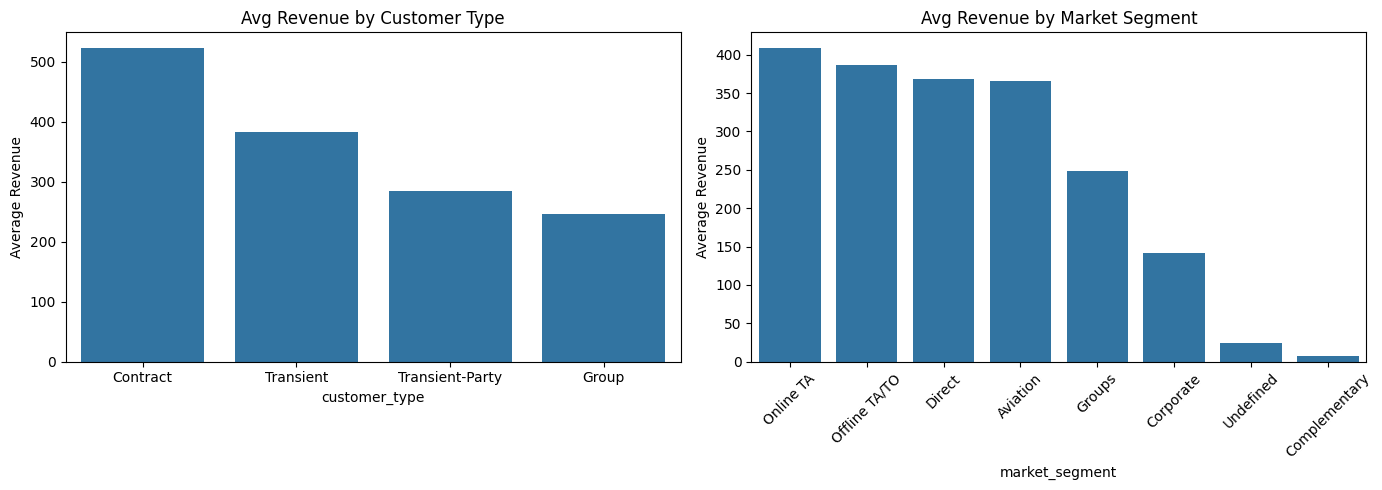

In [249]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.barplot(x=revenue_by_customer_type.index, y=revenue_by_customer_type.values)
plt.title('Avg Revenue by Customer Type')
plt.ylabel('Average Revenue')

plt.subplot(1,2,2)
sns.barplot(x=revenue_by_segment.index, y=revenue_by_segment.values)
plt.title('Avg Revenue by Market Segment')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

16.	Do bookings with more lead time or from specific countries yield higher ADR?

In [250]:
corr = df['lead_time'].corr(df['adr'])
print(f"Correlation between lead time and ADR: {corr:.3f}")

Correlation between lead time and ADR: 0.040


In [251]:
top_countries = df['country'].value_counts().nlargest(10).index

adr_by_country = df[df['country'].isin(top_countries)].groupby('country')['adr'].mean().sort_values(ascending=False)
print(adr_by_country)

country
BEL    112.857271
ITA    112.735745
ESP    112.666658
BRA    109.923323
FRA    109.279273
NLD    106.659489
DEU    104.513635
IRL     98.715740
GBR     94.889395
PRT     89.721637
Name: adr, dtype: float64


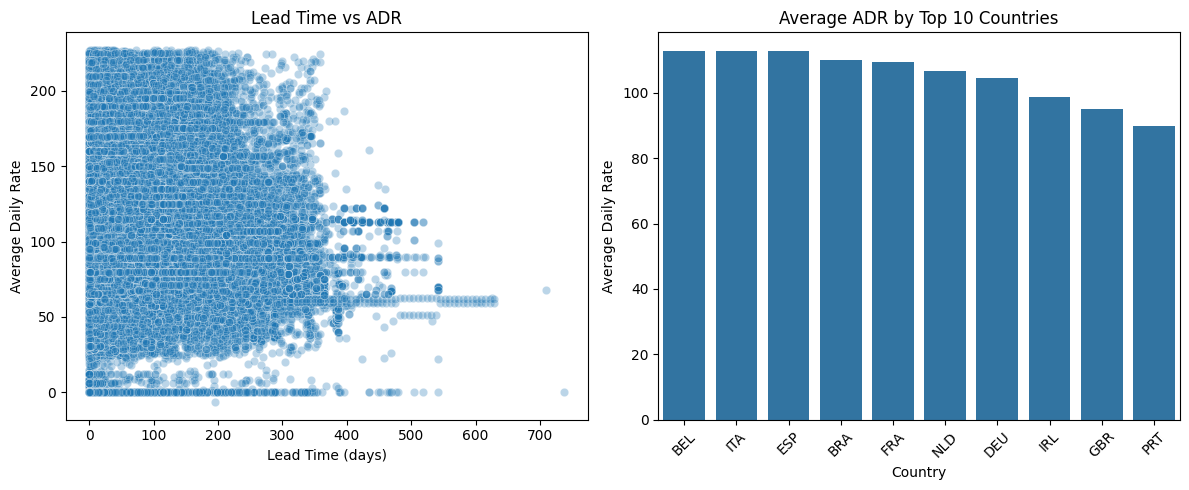

In [252]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='lead_time', y='adr', data=df, alpha=0.3)
plt.title('Lead Time vs ADR')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate')

plt.subplot(1,2,2)
sns.barplot(x=adr_by_country.index, y=adr_by_country.values)
plt.title('Average ADR by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

17.	Are guests with higher ADR more likely to request special services or make booking modifications?

In [253]:
print("Correlation of ADR with total special requests:", df['adr'].corr(df['total_of_special_requests']))
print("Correlation of ADR with booking changes:", df['adr'].corr(df['booking_changes']))

Correlation of ADR with total special requests: 0.15268426331425125
Correlation of ADR with booking changes: -0.013496640502597322


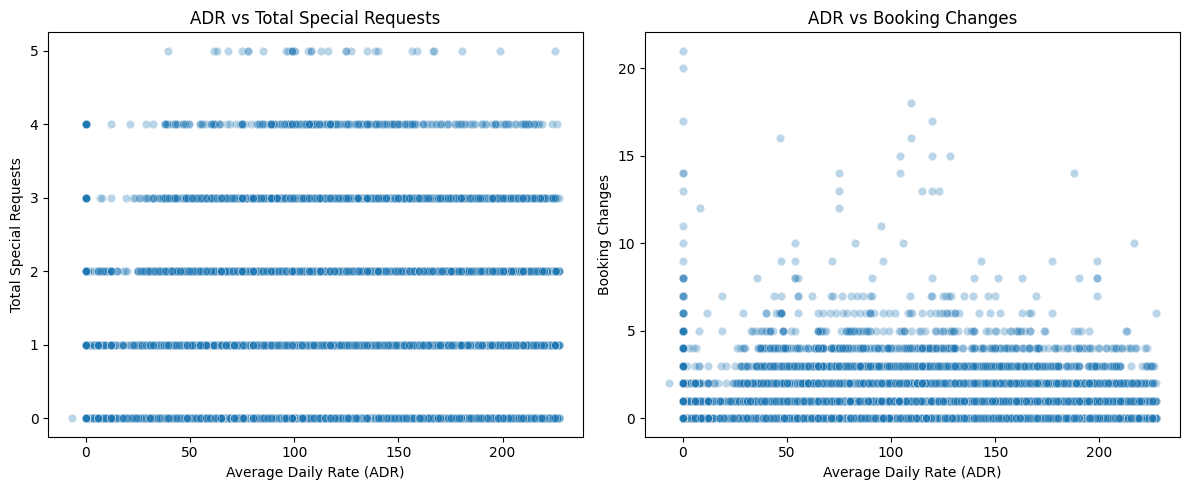

In [254]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='adr', y='total_of_special_requests', data=df, alpha=0.3)
plt.title('ADR vs Total Special Requests')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Total Special Requests')

plt.subplot(1,2,2)
sns.scatterplot(x='adr', y='booking_changes', data=df, alpha=0.3)
plt.title('ADR vs Booking Changes')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Booking Changes')

plt.tight_layout()
plt.show()


18.	Do guests from different countries behave differently in terms of booking timing or stay length?

In [259]:
country_behavior = df.groupby('country')[['lead_time', 'total_nights']].mean().sort_values(by='lead_time', ascending=False)
country_behavior.head(10)

,lead_time,total_nights
country,,
FJI,322.000000,3.000000
BEN,274.000000,2.333333
LCA,268.000000,5.000000
FRO,267.333333,10.666667
KNA,251.500000,2.000000
MYT,200.000000,2.000000
MKD,196.333333,3.777778
BRB,192.000000,2.000000
GUY,180.000000,3.000000


In [262]:
country_behavior = df.groupby('country')[['lead_time', 'total_nights']].mean().sort_values(by='total_nights', ascending=False)
country_behavior.head(10)

,lead_time,total_nights
country,,
FRO,267.333333,10.666667
SEN,41.222222,9.333333
AGO,23.496951,8.243902
TGO,62.000000,8.000000
GNB,40.888889,7.111111
BHS,159.000000,7.000000
PLW,169.000000,7.000000
SLE,84.000000,7.000000
RWA,102.000000,6.500000


19. Are guests who make booking changes more likely to request additional services or cancel?


In [264]:
contingency = pd.crosstab(df['booking_changes'] > 0, df['is_canceled'])
chi2, p, dof, expected = chi2_contingency(contingency)
chi2, p

# Ho: Guests who make booking changes are not more likely to cancel

# As p 0 < 0.05, we reject H0, Guests who make booking changes are more likely to request services or cancel.

(np.float64(1344.2271799088187), np.float64(2.767947913185542e-294))

In [266]:
contingency = pd.crosstab(df['booking_changes'] > 0, df['total_of_special_requests'])
chi2, p, dof, expected = chi2_contingency(contingency)
chi2, p


# Ho: Guests who make booking changes are likely to request additional services

# As p 0 < 0.05, we reject H0 ⇒ Guests who make booking changes are likely to request additional services.

(np.float64(148.35726746412558), np.float64(2.98650212450878e-30))